In [5]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
# 评价
from sklearn import metrics
# 交叉验证
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression

from sklearn.datasets import load_iris

# test load url


In [ ]:
# %load https://www.zhihu.com/people/wang-zhe-58
<!doctype html>
<html lang="zh" data-hairline="true" data-theme="light"><head><meta charSet="utf-8"/><title data-react-helmet="true">王喆 - 知乎</title><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1"/><meta name="renderer" content="webkit"/><meta name="force-rendering" content="webkit"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="google-site-verification" content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg"/><meta data-react-helmet="true" name="description" property="og:description" content="广告/推荐 Sr. Research SDE 回答数 111，获得 81,136 次赞同"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png" sizes="152x152"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-120.b3e6278d.png" sizes="120x120"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-76.7a750095.png" sizes="76x76"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-60.a4a761d4.png" sizes="60x60"/><link data-react-helmet="true" rel="prefetch" href="https://pic2.zhimg.com/80/v2-9e369b9a18fdc024874192322ecd5610_r.jpg"/><link rel="shortcut icon" type="image/x-icon" href="https://static.zhihu.com/static/favicon.ico"/><link rel="search" type="application/opensearchdescription+xml" href="https://static.zhihu.com/static/search.xml" title="知乎"/><link rel="dns-prefetch" href="//static.zhimg.com"/><link rel="dns-prefetch" href="//pic1.zhimg.com"/><link rel="dns-prefetch" href="//pic2.zhimg.com"/><link rel="dns-prefetch" href="//pic3.zhimg.com"/><link rel="dns-prefetch" href="//pic4.zhimg.com"/><style>
.u-safeAreaInset-top {
  height: constant(safe-area-inset-top) !important;
  height: env(safe-area-inset-top) !important;
  
}
.u-safeAreaInset-bottom {
  height: constant(safe-area-inset-bottom) !important;
  height: env(safe-area-inset-bottom) !important;
  
}
</style><link href="https://static.zhihu.com/heifetz/main.app.216a26f4.3e80177210daae7ceb52.css" rel="stylesheet"/><link href="https://static.zhihu.com/heifetz/main.people-routes.216a26f4.b90e94becde59fd75e7e.css" rel="stylesheet"/><script defer="" crossorigin="anonymous" src="https://unpkg.zhimg.com/@cfe/sentry-script@latest/dist/init.js" data-sentry-config="{&quot;dsn&quot;:&quot;https://2d8d764432cc4f6fb3bc78ab9528299d@crash2.zhihu.com/1224&quot;,&quot;sampleRate&quot;:0.1,&quot;release&quot;:&quot;1295-fbec0962&quot;,&quot;ignoreErrorNames&quot;:[&quot;NetworkError&quot;,&quot;SecurityError&quot;],&quot;ignoreErrors&quot;:[&quot;origin message&quot;,&quot;Network request failed&quot;,&quot;Loading chunk&quot;,&quot;这个系统不支持该功能。&quot;,&quot;Can&#x27;t find variable: webkit&quot;,&quot;Can&#x27;t find variable: $&quot;,&quot;内存不足&quot;,&quot;out of memory&quot;,&quot;DOM Exception 18&quot;,&quot;The operation is insecure&quot;,&quot;[object Event]&quot;,&quot;[object FileError]&quot;,&quot;[object DOMError]&quot;,&quot;[object Object]&quot;,&quot;拒绝访问。&quot;,&quot;Maximum call stack size exceeded&quot;,&quot;UploadError&quot;,&quot;无法 fetch&quot;,&quot;draft-js&quot;,&quot;缺少 JavaScript 对象&quot;,&quot;componentWillEnter&quot;,&quot;componentWillLeave&quot;,&quot;componentWillAppear&quot;,&quot;getInlineStyleAt&quot;,&quot;getCharacterList&quot;],&quot;whitelistUrls&quot;:[&quot;static.zhihu.com&quot;]}"></script></head><body><div id="root"><div><div class="LoadingBar"></div><div><header role="banner" class="Sticky AppHeader" data-za-module="TopNavBar"><style data-emotion-css="qqgmyv">.css-qqgmyv{width:auto;max-width:1156px;min-width:1000px;padding-left:16px;padding-right:30px;}.css-qqgmyv .AppHeader-userInfo{margin-left:30px;width:auto;}.css-qqgmyv .AppHeader-TabsLink.is-active,.css-qqgmyv .AppHeader-TabsLink:hover{color:#121212;}</style><div class="AppHeader-inner css-qqgmyv"><a class="ZhihuLogoLink" href="//www.zhihu.com" aria-label="知乎"><svg viewBox="0 0 200 91" fill="#0084FF" width="64" height="30"><path d="M53.29 80.035l7.32.002 2.41 8.24 13.128-8.24h15.477v-67.98H53.29v67.978zm7.79-60.598h22.756v53.22h-8.73l-8.718 5.473-1.587-5.46-3.72-.012v-53.22zM46.818 43.162h-16.35c.545-8.467.687-16.12.687-22.955h15.987s.615-7.05-2.68-6.97H16.807c1.09-4.1 2.46-8.332 4.1-12.708 0 0-7.523 0-10.085 6.74-1.06 2.78-4.128 13.48-9.592 24.41 1.84-.2 7.927-.37 11.512-6.94.66-1.84.785-2.08 1.605-4.54h9.02c0 3.28-.374 20.9-.526 22.95H6.51c-3.67 0-4.863 7.38-4.863 7.38H22.14C20.765 66.11 13.385 79.24 0 89.62c6.403 1.828 12.784-.29 15.937-3.094 0 0 7.182-6.53 11.12-21.64L43.92 85.18s2.473-8.402-.388-12.496c-2.37-2.788-8.768-10.33-11.496-13.064l-4.57 3.627c1.363-4.368 2.183-8.61 2.46-12.71H49.19s-.027-7.38-2.372-7.38zm128.752-.502c6.51-8.013 14.054-18.302 14.054-18.302s-5.827-4.625-8.556-1.27c-1.874 2.548-11.51 15.063-11.51 15.063l6.012 4.51zm-46.903-18.462c-2.814-2.577-8.096.667-8.096.667s12.35 17.2 12.85 17.953l6.08-4.29s-8.02-11.752-10.83-14.33zM199.99 46.5c-6.18 0-40.908.292-40.953.292v-31.56c1.503 0 3.882-.124 7.14-.376 12.773-.753 21.914-1.25 27.427-1.504 0 0 3.817-8.496-.185-10.45-.96-.37-7.24 1.43-7.24 1.43s-51.63 5.153-72.61 5.64c.5 2.756 2.38 5.336 4.93 6.11 4.16 1.087 7.09.53 15.36.277 7.76-.5 13.65-.76 17.66-.76v31.19h-41.71s.88 6.97 7.97 7.14h33.73v22.16c0 4.364-3.498 6.87-7.65 6.6-4.4.034-8.15-.36-13.027-.566.623 1.24 1.977 4.496 6.035 6.824 3.087 1.502 5.054 2.053 8.13 2.053 9.237 0 14.27-5.4 14.027-14.16V53.93h38.235c3.026 0 2.72-7.432 2.72-7.432z" fill-rule="evenodd"></path></svg></a><style data-emotion-css="g0ay3v">.css-g0ay3v{margin-left:25px;margin-right:15px;}.css-g0ay3v .AppHeader-Tab{padding-left:15px;padding-right:15px;}.css-g0ay3v .Tabs-link.is-active::after{height:4px;}</style><ul role="navigation" class="Tabs AppHeader-Tabs css-g0ay3v"><li role="tab" class="Tabs-item AppHeader-Tab Tabs-item--noMeta"><a class="Tabs-link AppHeader-TabsLink" href="//www.zhihu.com/" data-za-not-track-link="true">首页</a></li><li role="tab" class="Tabs-item AppHeader-Tab Tabs-item--noMeta"><a class="Tabs-link AppHeader-TabsLink" href="//www.zhihu.com/xen/vip-web" data-za-not-track-link="true">会员</a></li><li role="tab" class="Tabs-item AppHeader-Tab Tabs-item--noMeta"><a class="Tabs-link AppHeader-TabsLink" href="//www.zhihu.com/explore" data-za-not-track-link="true">发现</a></li><li role="tab" class="Tabs-item AppHeader-Tab Tabs-item--noMeta"><a class="Tabs-link AppHeader-TabsLink" href="//www.zhihu.com/question/waiting" data-za-not-track-link="true">等你来答</a></li></ul><style data-emotion-css="1acwmmj">.css-1acwmmj{box-sizing:border-box;margin:0;min-width:0;-webkit-flex:1;-ms-flex:1;flex:1;-webkit-box-pack:center;-webkit-justify-content:center;-ms-flex-pack:center;justify-content:center;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;}</style><div class="css-1acwmmj"><style data-emotion-css="10fy1q8">.css-10fy1q8{max-width:482px;}.css-10fy1q8 .SearchBar-input{border-radius:999px;padding-left:16px;}.css-10fy1q8 .SearchBar-askButton{border-radius:999px;width:70px;margin-left:12px;}.css-10fy1q8 .SearchBar-searchButton{border-bottom-right-radius:999px;border-top-right-radius:999px;}</style><div class="SearchBar AppHeader-SearchBar css-10fy1q8" role="search" data-za-module="PresetWordItem"><form class="SearchBar-tool"><div><div class="Popover"><label class="SearchBar-input Input-wrapper Input-wrapper--grey"><input type="text" maxLength="100" value="" autoComplete="off" role="combobox" aria-expanded="false" aria-autocomplete="list" aria-activedescendant="null--1" id="null-toggle" aria-haspopup="true" aria-owns="null-content" class="Input" placeholder=""/><button aria-label="搜索" type="button" class="Button SearchBar-searchButton Button--primary"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Search SearchBar-searchIcon" fill="currentColor" viewBox="0 0 24 24" width="18" height="18"><path d="M17.068 15.58a8.377 8.377 0 0 0 1.774-5.159 8.421 8.421 0 1 0-8.42 8.421 8.38 8.38 0 0 0 5.158-1.774l3.879 3.88c.957.573 2.131-.464 1.488-1.49l-3.879-3.878zm-6.647 1.157a6.323 6.323 0 0 1-6.316-6.316 6.323 6.323 0 0 1 6.316-6.316 6.323 6.323 0 0 1 6.316 6.316 6.323 6.323 0 0 1-6.316 6.316z" fill-rule="evenodd"></path></svg></span></button></label></div></div></form></div></div><div class="AppHeader-userInfo"><div class="AppHeader-profile"><div><button type="button" class="Button AppHeader-login Button--blue">登录</button><button type="button" class="Button Button--primary Button--blue">加入知乎</button></div></div></div></div><div></div></header></div><main role="main" class="App-main"><div itemProp="people" itemType="http://schema.org/Person" itemscope=""><meta itemProp="url" content="https://www.zhihu.com/people/wang-zhe-58"/><meta itemProp="gender" content="Male"/><meta itemProp="image" content="https://pic1.zhimg.com/08f032fe9b5e5cdf1b435321f1dbc0ec_l.jpg"/><meta itemProp="zhihu:voteupCount" content="81136"/><meta itemProp="zhihu:thankedCount" content="10913"/><meta itemProp="zhihu:followerCount" content="96333"/><meta itemProp="zhihu:answerCount" content="111"/><meta itemProp="zhihu:articlesCount" content="63"/><div id="ProfileHeader" class="ProfileHeader"><div class="Card"><div class="ProfileHeader-userCover"><div class="UserCover"><div class="VagueImage UserCover-image" data-src="https://pic2.zhimg.com/80/v2-9e369b9a18fdc024874192322ecd5610_r.jpg"><div class="VagueImage-mask is-active"></div></div></div></div><div class="ProfileHeader-wrapper"><div class="ProfileHeader-main"><div class="UserAvatar ProfileHeader-avatar" style="top:-25px"><img class="Avatar Avatar--large UserAvatar-inner" width="160" height="160" src="https://pic1.zhimg.com/08f032fe9b5e5cdf1b435321f1dbc0ec_xl.jpg" srcSet="https://pic1.zhimg.com/08f032fe9b5e5cdf1b435321f1dbc0ec_xll.jpg 2x"/></div><div class="ProfileHeader-content"><div class="ProfileHeader-contentHead"><h1 class="ProfileHeader-title"><span class="ProfileHeader-name">王喆</span><span class="ztext ProfileHeader-headline">广告/推荐 Sr. Research SDE</span></h1></div><div style="overflow:hidden;transition:height 300ms ease-out" class="ProfileHeader-contentBody"><div><div class="ProfileHeader-info"><div class="ProfileHeader-infoItem"><div class="ProfileHeader-iconWrapper"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Company" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M17 6.998h3.018c1.098 0 1.975.89 1.982 2.002v10a1.993 1.993 0 0 1-1.987 2H3.98A1.983 1.983 0 0 1 2 19l.009-10.003c0-1.11.873-1.999 1.971-1.999L7 7V5c.016-1.111.822-2 2-2h6c.98 0 1.86.889 2 2v1.998zM9 7h6V5.5s0-.5-.5-.5h-5c-.504 0-.5.5-.5.5V7z" fill-rule="evenodd"></path></svg></span></div>互联网<div class="ProfileHeader-divider"></div>Hulu<div class="ProfileHeader-divider"></div>Senior Research SDE</div><div class="ProfileHeader-infoItem"><div class="ProfileHeader-iconWrapper"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Education" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M12 4L1 7.94v.588l4.153 2.73v5.166C5.158 16.758 8.028 20 12 20c3.972 0 6.808-3.116 6.85-3.576l.006-5.163 4.129-2.733.015-.586L12 4z" fill-rule="evenodd"></path></svg></span></div>清华大学<div class="ProfileHeader-divider"></div>计算机科学与技术<div class="ProfileHeader-divider"></div><div class="ProfileHeader-iconWrapper"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Male" fill="currentColor" viewBox="0 0 24 24" width="24" height="24"><path d="M8.025 15.641a3.5 3.5 0 1 1 4.95-4.95 3.5 3.5 0 0 1-4.95 4.95zm10.122-9.369a.759.759 0 0 0-.753-.753L13.322 5a.738.738 0 0 0-.744.744.757.757 0 0 0 .751.752l2.127.313c-.95.954-1.832 1.83-1.832 1.83a5.502 5.502 0 0 0-7.013 8.416 5.5 5.5 0 0 0 8.415-7.016l1.842-1.819.303 2.116a.758.758 0 0 0 .752.753.738.738 0 0 0 .744-.744l-.52-4.073z" fill-rule="evenodd"></path></svg></span></div></div></div></div></div><div class="ProfileHeader-contentFooter"><button type="button" class="Button ProfileHeader-expandButton Button--plain"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--ArrowDown" fill="currentColor" viewBox="0 0 24 24" width="24" height="24"><path d="M12 13L8.285 9.218a.758.758 0 0 0-1.064 0 .738.738 0 0 0 0 1.052l4.249 4.512a.758.758 0 0 0 1.064 0l4.246-4.512a.738.738 0 0 0 0-1.052.757.757 0 0 0-1.063 0L12.002 13z" fill-rule="evenodd"></path></svg></span> 查看详细资料</button><div class="MemberButtonGroup ProfileButtonGroup ProfileHeader-buttons"><button type="button" class="Button FollowButton Button--primary Button--blue"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Plus FollowButton-icon" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M13.491 10.488s-.012-5.387 0-5.998c-.037-1.987-3.035-1.987-2.997 0-.038 1.912 0 5.998 0 5.998H4.499c-1.999.01-1.999 3.009 0 3.009s5.995-.01 5.995-.01v5.999c0 2.019 3.006 2.019 2.997 0-.01-2.019 0-5.998 0-5.998s3.996.009 6.004.009c2.008 0 2.008-3-.01-3.009h-5.994z" fill-rule="evenodd"></path></svg></span>关注他</button><button type="button" class="Button Button--grey Button--withIcon Button--withLabel"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Comments Button-zi" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M11 2c5.571 0 9 4.335 9 8 0 6-6.475 9.764-11.481 8.022-.315-.07-.379-.124-.78.078-1.455.54-2.413.921-3.525 1.122-.483.087-.916-.25-.588-.581 0 0 .677-.417.842-1.904.064-.351-.14-.879-.454-1.171A8.833 8.833 0 0 1 2 10c0-3.87 3.394-8 9-8zm10.14 9.628c.758.988.86 2.009.86 3.15 0 1.195-.619 3.11-1.368 3.938-.209.23-.354.467-.308.722.12 1.073.614 1.501.614 1.501.237.239-.188.562-.537.5-.803-.146-1.495-.42-2.546-.811-.29-.146-.336-.106-.563-.057-2.043.711-4.398.475-6.083-.927 5.965-.524 8.727-3.03 9.93-8.016z" fill-rule="evenodd"></path></svg></span>发私信</button></div></div></div></div></div></div></div><div class="Profile-main"><div class="Profile-mainColumn"><div class="Card ProfileMain" id="ProfileMain"><div class="ProfileMain-header"><ul role="tablist" class="Tabs ProfileMain-tabs"><li role="tab" class="Tabs-item Tabs-item--noMeta" aria-controls="Profile-activities"><a class="Tabs-link is-active" href="/people/wang-zhe-58">动态</a></li><li role="tab" class="Tabs-item" aria-controls="Profile-answers"><a class="Tabs-link" href="/people/wang-zhe-58/answers">回答<span class="Tabs-meta">111</span></a></li><li role="tab" class="Tabs-item" aria-controls="Profile-answers"><a class="Tabs-link" href="/people/wang-zhe-58/zvideos">视频<span class="Tabs-meta">0</span></a></li><li role="tab" class="Tabs-item" aria-controls="Profile-asks"><a class="Tabs-link" href="/people/wang-zhe-58/asks">提问<span class="Tabs-meta">7</span></a></li><li role="tab" class="Tabs-item" aria-controls="Profile-posts"><a class="Tabs-link" href="/people/wang-zhe-58/posts">文章<span class="Tabs-meta">63</span></a></li><li role="tab" class="Tabs-item" aria-controls="Profile-columns"><a class="Tabs-link" href="/people/wang-zhe-58/columns">专栏<span class="Tabs-meta">1</span></a></li><li role="tab" class="Tabs-item" aria-controls="Profile-pins"><a meta="59" class="Tabs-link" href="/people/wang-zhe-58/pins">想法<span class="Tabs-meta">59</span></a></li><li role="tab" class="Tabs-item" aria-controls="Profile-favlists"><a meta="1" class="Tabs-link" href="/people/wang-zhe-58/collections">收藏<span class="Tabs-meta">1</span></a></li><li role="tab" class="Tabs-item Tabs-item--noMeta" aria-controls="Profile-favlists"><a class="Tabs-link" href="/people/wang-zhe-58/following">关注</a></li></ul></div><div><div class="Sticky"></div></div><div class="ListShortcut"><div class="List ProfileActivities" id="Profile-activities" data-zop-feedlistfather="1"><div class="List-header"><h4 class="List-headerText"><span>他<!-- -->的动态</span></h4><div class="List-headerOptions"></div></div><div class=""><div class="List-item" tabindex="0"><div class="List-itemMeta"><div class="ActivityItem-meta"><span class="ActivityItem-metaTitle">赞同了回答</span><span>35 分钟前</span></div></div><div class="ContentItem AnswerItem" data-zop="{&quot;authorName&quot;:&quot;Timothy-xie&quot;,&quot;itemId&quot;:1622484513,&quot;title&quot;:&quot;如何评价深度学习相关顶级期刊论文难复现的问题？&quot;,&quot;type&quot;:&quot;answer&quot;}" name="1622484513" itemProp="answer" itemType="http://schema.org/Answer" itemscope=""><h2 class="ContentItem-title"><div itemProp="zhihu:question" itemType="http://schema.org/Question" itemscope=""><meta itemProp="url" content="https://www.zhihu.com/question/265953178"/><meta itemProp="name" content="如何评价深度学习相关顶级期刊论文难复现的问题？"/><a target="_blank" data-za-detail-view-element_name="Title" href="//www.zhihu.com/question/265953178/answer/1622484513">如何评价深度学习相关顶级期刊论文难复现的问题？</a></div></h2><div class="ContentItem-meta"><div class="AuthorInfo AnswerItem-authorInfo" itemProp="author" itemscope="" itemType="http://schema.org/Person"><meta itemProp="name" content="Timothy-xie"/><meta itemProp="image" content="https://pic1.zhimg.com/50/v2-c8ea95758350a0573277e2ba867ea3ba_s.jpg"/><meta itemProp="url" content="https://www.zhihu.com/people/xie-tian-bao-69"/><meta itemProp="zhihu:followerCount"/><span class="UserLink AuthorInfo-avatarWrapper"><a class="UserLink-link" data-za-detail-view-element_name="User" target="_blank" href="//www.zhihu.com/people/xie-tian-bao-69"><img class="Avatar AuthorInfo-avatar" width="38" height="38" src="https://pic1.zhimg.com/50/v2-c8ea95758350a0573277e2ba867ea3ba_xs.jpg" srcSet="https://pic1.zhimg.com/50/v2-c8ea95758350a0573277e2ba867ea3ba_l.jpg 2x" alt="Timothy-xie"/></a></span><div class="AuthorInfo-content"><div class="AuthorInfo-head"><span class="UserLink AuthorInfo-name"><a class="UserLink-link" data-za-detail-view-element_name="User" target="_blank" href="//www.zhihu.com/people/xie-tian-bao-69">Timothy-xie</a><style data-emotion-css="1cd9gw4">.css-1cd9gw4{margin-left:.3em;}</style></span></div><div class="AuthorInfo-detail"><div class="AuthorInfo-badge"><div class="ztext AuthorInfo-badgeText">拒绝traditional</div></div></div></div></div><style data-emotion-css="h5al4j">.css-h5al4j{box-sizing:border-box;margin:0;min-width:0;color:#8590A6;font-size:14px;margin-top:10px;margin-bottom:-4px;}</style><div class="css-h5al4j"><span><span class="Voters"><button type="button" class="Button Button--plain">20 人<!-- -->也赞同了该回答</button></span></span></div></div><meta itemProp="image" content=""/><meta itemProp="upvoteCount" content="20"/><meta itemProp="url" content="https://www.zhihu.com/question/265953178/answer/1622484513"/><meta itemProp="dateCreated" content="2020-12-11T12:15:07.000Z"/><meta itemProp="dateModified" content="2020-12-13T02:18:39.000Z"/><meta itemProp="commentCount" content="0"/><div class="RichContent is-collapsed"><div class="RichContent-inner"><span class="RichText ztext CopyrightRichText-richText" itemProp="text">现在复现真的真的炒鸡难。（毕竟一年几千篇，也不能全特别受重视地精读…1、难以获取相同的训练环境。巨型公司如Google，batch size直接给你开到8192，或者GPU限制到V100、A100，有的环境不给全，模型不给能load的，想重新训试试门都没有。（给学长搬砖中的亲身经历2、是否给予可以直接load进来的模型and资源和时间是否允许调参到论文的程度。如果给了模型确实好说一些，结合代码至少大概率证明工作是可以做到的，多一些复现的自…</span><button type="button" class="Button ContentItem-more Button--plain">阅读全文<span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--ArrowDown ContentItem-arrowIcon" fill="currentColor" viewBox="0 0 24 24" width="24" height="24"><path d="M12 13L8.285 9.218a.758.758 0 0 0-1.064 0 .738.738 0 0 0 0 1.052l4.249 4.512a.758.758 0 0 0 1.064 0l4.246-4.512a.738.738 0 0 0 0-1.052.757.757 0 0 0-1.063 0L12.002 13z" fill-rule="evenodd"></path></svg></span></button></div><div class="ContentItem-actions"><span><button aria-label="赞同 20 " type="button" class="Button VoteButton VoteButton--up"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--TriangleUp VoteButton-TriangleUp" fill="currentColor" viewBox="0 0 24 24" width="10" height="10"><path d="M2 18.242c0-.326.088-.532.237-.896l7.98-13.203C10.572 3.57 11.086 3 12 3c.915 0 1.429.571 1.784 1.143l7.98 13.203c.15.364.236.57.236.896 0 1.386-.875 1.9-1.955 1.9H3.955c-1.08 0-1.955-.517-1.955-1.9z" fill-rule="evenodd"></path></svg></span>赞同 20</button><button aria-label="反对" type="button" class="Button VoteButton VoteButton--down"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--TriangleDown" fill="currentColor" viewBox="0 0 24 24" width="10" height="10"><path d="M20.044 3H3.956C2.876 3 2 3.517 2 4.9c0 .326.087.533.236.896L10.216 19c.355.571.87 1.143 1.784 1.143s1.429-.572 1.784-1.143l7.98-13.204c.149-.363.236-.57.236-.896 0-1.386-.876-1.9-1.956-1.9z" fill-rule="evenodd"></path></svg></span></button></span><button type="button" class="Button ContentItem-action Button--plain Button--withIcon Button--withLabel"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Comment Button-zi" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M10.241 19.313a.97.97 0 0 0-.77.2 7.908 7.908 0 0 1-3.772 1.482.409.409 0 0 1-.38-.637 5.825 5.825 0 0 0 1.11-2.237.605.605 0 0 0-.227-.59A7.935 7.935 0 0 1 3 11.25C3 6.7 7.03 3 12 3s9 3.7 9 8.25-4.373 9.108-10.759 8.063z" fill-rule="evenodd"></path></svg></span>添加评论</button><div class="Popover ShareMenu ContentItem-action"><div class="ShareMenu-toggler" id="null-toggle" aria-haspopup="true" aria-expanded="false" aria-owns="null-content"><button type="button" class="Button Button--plain Button--withIcon Button--withLabel"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Share Button-zi" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M2.931 7.89c-1.067.24-1.275 1.669-.318 2.207l5.277 2.908 8.168-4.776c.25-.127.477.198.273.39L9.05 14.66l.927 5.953c.18 1.084 1.593 1.376 2.182.456l9.644-15.242c.584-.892-.212-2.029-1.234-1.796L2.93 7.89z" fill-rule="evenodd"></path></svg></span>分享</button></div></div><button type="button" class="Button ContentItem-action Button--plain Button--withIcon Button--withLabel"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Star Button-zi" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M5.515 19.64l.918-5.355-3.89-3.792c-.926-.902-.639-1.784.64-1.97L8.56 7.74l2.404-4.871c.572-1.16 1.5-1.16 2.072 0L15.44 7.74l5.377.782c1.28.186 1.566 1.068.64 1.97l-3.89 3.793.918 5.354c.219 1.274-.532 1.82-1.676 1.218L12 18.33l-4.808 2.528c-1.145.602-1.896.056-1.677-1.218z" fill-rule="evenodd"></path></svg></span>收藏</button><button type="button" class="Button ContentItem-action Button--plain Button--withIcon Button--withLabel"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Heart Button-zi" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M2 8.437C2 5.505 4.294 3.094 7.207 3 9.243 3 11.092 4.19 12 6c.823-1.758 2.649-3 4.651-3C19.545 3 22 5.507 22 8.432 22 16.24 13.842 21 12 21 10.158 21 2 16.24 2 8.437z" fill-rule="evenodd"></path></svg></span>喜欢</button></div></div><div class="ModalWrap"><div><div class=""></div><div class="ModalExp-content"><div class="ModalWrap-content"><div class="ModalWrap-title">继续浏览内容</div><div class="ModalWrap-item"><div class="ModalWrap-itemImg"><img src="https://pic1.zhimg.com/80/v2-10e18ff65a640175ad058b4b5dfd2867_1440w.png"/></div><div class="ModalWrap-itemContent"><div class="ModalWrap-itemTitle">知乎</div><div class="ModalWrap-itemDesc">发现更大的世界</div></div><div class="ModalWrap-itemBtn">打开</div></div><div class="ModalWrap-item"><div class="ModalWrap-itemImg"><img src="https://pic2.zhimg.com/80/v2-da7d9e4b6a7ddba507299bcf5a4d0600_1440w.png"/></div><div class="ModalWrap-itemContent"><div class="ModalWrap-itemTitle">浏览器</div></div><div class="ModalWrap-itemBtn">继续</div></div></div></div></div></div><div><div><div class=""></div><div class="ModalLoading-content"><svg width="30" height="30" viewBox="0 0 66 66" xmlns="http://www.w3.org/2000/svg" class="CircleLoadingBar" aria-hidden="true"><g><circle class="path" fill="none" stroke-width="6" stroke-linecap="round" cx="33" cy="33" r="30"></circle></g></svg></div></div></div></div></div><div class="List-item" tabindex="0"><div class="List-itemMeta"><div class="ActivityItem-meta"><span class="ActivityItem-metaTitle">赞同了回答</span><span>5 小时前</span></div></div><div class="ContentItem AnswerItem" data-zop="{&quot;authorName&quot;:&quot;师爷孙&quot;,&quot;itemId&quot;:1625447132,&quot;title&quot;:&quot;如何改善出租车司机越来越不赚钱的现状？&quot;,&quot;type&quot;:&quot;answer&quot;}" name="1625447132" itemProp="answer" itemType="http://schema.org/Answer" itemscope=""><h2 class="ContentItem-title"><div itemProp="zhihu:question" itemType="http://schema.org/Question" itemscope=""><meta itemProp="url" content="https://www.zhihu.com/question/432136728"/><meta itemProp="name" content="如何改善出租车司机越来越不赚钱的现状？"/><a target="_blank" data-za-detail-view-element_name="Title" href="//www.zhihu.com/question/432136728/answer/1625447132">如何改善出租车司机越来越不赚钱的现状？</a></div></h2><div class="ContentItem-meta"><div class="AuthorInfo AnswerItem-authorInfo" itemProp="author" itemscope="" itemType="http://schema.org/Person"><meta itemProp="name" content="师爷孙"/><meta itemProp="image" content="https://pic2.zhimg.com/50/v2-d68f1c6ae36301807a47d6eca3dc39a3_s.jpg"/><meta itemProp="url" content="https://www.zhihu.com/people/jin-wan-da-lao-hu-27-44"/><meta itemProp="zhihu:followerCount"/><span class="UserLink AuthorInfo-avatarWrapper"><a class="UserLink-link" data-za-detail-view-element_name="User" target="_blank" href="//www.zhihu.com/people/jin-wan-da-lao-hu-27-44"><img class="Avatar AuthorInfo-avatar" width="38" height="38" src="https://pic2.zhimg.com/50/v2-d68f1c6ae36301807a47d6eca3dc39a3_xs.jpg" srcSet="https://pic2.zhimg.com/50/v2-d68f1c6ae36301807a47d6eca3dc39a3_l.jpg 2x" alt="师爷孙"/></a></span><div class="AuthorInfo-content"><div class="AuthorInfo-head"><span class="UserLink AuthorInfo-name"><a class="UserLink-link" data-za-detail-view-element_name="User" target="_blank" href="//www.zhihu.com/people/jin-wan-da-lao-hu-27-44">师爷孙</a><style data-emotion-css="1cd9gw4">.css-1cd9gw4{margin-left:.3em;}</style></span></div><div class="AuthorInfo-detail"><div class="AuthorInfo-badge"><div class="ztext AuthorInfo-badgeText">当过老师干过地产吃过官饭</div></div></div></div></div><style data-emotion-css="h5al4j">.css-h5al4j{box-sizing:border-box;margin:0;min-width:0;color:#8590A6;font-size:14px;margin-top:10px;margin-bottom:-4px;}</style><div class="css-h5al4j"><span><span class="Voters"><button type="button" class="Button Button--plain">697 人<!-- -->也赞同了该回答</button></span></span></div></div><meta itemProp="image" content=""/><meta itemProp="upvoteCount" content="697"/><meta itemProp="url" content="https://www.zhihu.com/question/432136728/answer/1625447132"/><meta itemProp="dateCreated" content="2020-12-13T14:00:51.000Z"/><meta itemProp="dateModified" content="2020-12-13T14:00:51.000Z"/><meta itemProp="commentCount" content="58"/><div class="RichContent is-collapsed"><div class="RichContent-inner"><span class="RichText ztext CopyrightRichText-richText" itemProp="text">我看了下很多回答，发现全国不论北上广深还是偏远四线城市，出租车司机都有共通的毛病：1，从来不反思自己有什么问题，张嘴就是表蹦的钱太少，得加钱。私家车太多，得收过路费，但是不要收我出租车的。2，从来不反思服务有什么问题，张嘴就是必须全部封禁网约车等各种竞争对手。结论：把其他交通工具都干死，我的生意就好了。。。这是何等奇葩的思维啊。。。这搁咱们任何一个普通人头上，都是活等着饿死的态度。这就等于：我考不…</span><button type="button" class="Button ContentItem-more Button--plain">阅读全文<span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--ArrowDown ContentItem-arrowIcon" fill="currentColor" viewBox="0 0 24 24" width="24" height="24"><path d="M12 13L8.285 9.218a.758.758 0 0 0-1.064 0 .738.738 0 0 0 0 1.052l4.249 4.512a.758.758 0 0 0 1.064 0l4.246-4.512a.738.738 0 0 0 0-1.052.757.757 0 0 0-1.063 0L12.002 13z" fill-rule="evenodd"></path></svg></span></button></div><div class="ContentItem-actions"><span><button aria-label="赞同 697 " type="button" class="Button VoteButton VoteButton--up"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--TriangleUp VoteButton-TriangleUp" fill="currentColor" viewBox="0 0 24 24" width="10" height="10"><path d="M2 18.242c0-.326.088-.532.237-.896l7.98-13.203C10.572 3.57 11.086 3 12 3c.915 0 1.429.571 1.784 1.143l7.98 13.203c.15.364.236.57.236.896 0 1.386-.875 1.9-1.955 1.9H3.955c-1.08 0-1.955-.517-1.955-1.9z" fill-rule="evenodd"></path></svg></span>赞同 697</button><button aria-label="反对" type="button" class="Button VoteButton VoteButton--down"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--TriangleDown" fill="currentColor" viewBox="0 0 24 24" width="10" height="10"><path d="M20.044 3H3.956C2.876 3 2 3.517 2 4.9c0 .326.087.533.236.896L10.216 19c.355.571.87 1.143 1.784 1.143s1.429-.572 1.784-1.143l7.98-13.204c.149-.363.236-.57.236-.896 0-1.386-.876-1.9-1.956-1.9z" fill-rule="evenodd"></path></svg></span></button></span><button type="button" class="Button ContentItem-action Button--plain Button--withIcon Button--withLabel"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Comment Button-zi" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M10.241 19.313a.97.97 0 0 0-.77.2 7.908 7.908 0 0 1-3.772 1.482.409.409 0 0 1-.38-.637 5.825 5.825 0 0 0 1.11-2.237.605.605 0 0 0-.227-.59A7.935 7.935 0 0 1 3 11.25C3 6.7 7.03 3 12 3s9 3.7 9 8.25-4.373 9.108-10.759 8.063z" fill-rule="evenodd"></path></svg></span>58 条评论</button><div class="Popover ShareMenu ContentItem-action"><div class="ShareMenu-toggler" id="null-toggle" aria-haspopup="true" aria-expanded="false" aria-owns="null-content"><button type="button" class="Button Button--plain Button--withIcon Button--withLabel"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Share Button-zi" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M2.931 7.89c-1.067.24-1.275 1.669-.318 2.207l5.277 2.908 8.168-4.776c.25-.127.477.198.273.39L9.05 14.66l.927 5.953c.18 1.084 1.593 1.376 2.182.456l9.644-15.242c.584-.892-.212-2.029-1.234-1.796L2.93 7.89z" fill-rule="evenodd"></path></svg></span>分享</button></div></div><button type="button" class="Button ContentItem-action Button--plain Button--withIcon Button--withLabel"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Star Button-zi" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M5.515 19.64l.918-5.355-3.89-3.792c-.926-.902-.639-1.784.64-1.97L8.56 7.74l2.404-4.871c.572-1.16 1.5-1.16 2.072 0L15.44 7.74l5.377.782c1.28.186 1.566 1.068.64 1.97l-3.89 3.793.918 5.354c.219 1.274-.532 1.82-1.676 1.218L12 18.33l-4.808 2.528c-1.145.602-1.896.056-1.677-1.218z" fill-rule="evenodd"></path></svg></span>收藏</button><button type="button" class="Button ContentItem-action Button--plain Button--withIcon Button--withLabel"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Heart Button-zi" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M2 8.437C2 5.505 4.294 3.094 7.207 3 9.243 3 11.092 4.19 12 6c.823-1.758 2.649-3 4.651-3C19.545 3 22 5.507 22 8.432 22 16.24 13.842 21 12 21 10.158 21 2 16.24 2 8.437z" fill-rule="evenodd"></path></svg></span>喜欢</button></div></div><div class="ModalWrap"><div><div class=""></div><div class="ModalExp-content"><div class="ModalWrap-content"><div class="ModalWrap-title">继续浏览内容</div><div class="ModalWrap-item"><div class="ModalWrap-itemImg"><img src="https://pic1.zhimg.com/80/v2-10e18ff65a640175ad058b4b5dfd2867_1440w.png"/></div><div class="ModalWrap-itemContent"><div class="ModalWrap-itemTitle">知乎</div><div class="ModalWrap-itemDesc">发现更大的世界</div></div><div class="ModalWrap-itemBtn">打开</div></div><div class="ModalWrap-item"><div class="ModalWrap-itemImg"><img src="https://pic2.zhimg.com/80/v2-da7d9e4b6a7ddba507299bcf5a4d0600_1440w.png"/></div><div class="ModalWrap-itemContent"><div class="ModalWrap-itemTitle">浏览器</div></div><div class="ModalWrap-itemBtn">继续</div></div></div></div></div></div><div><div><div class=""></div><div class="ModalLoading-content"><svg width="30" height="30" viewBox="0 0 66 66" xmlns="http://www.w3.org/2000/svg" class="CircleLoadingBar" aria-hidden="true"><g><circle class="path" fill="none" stroke-width="6" stroke-linecap="round" cx="33" cy="33" r="30"></circle></g></svg></div></div></div></div></div><div></div></div></div></div></div></div><div class="Profile-sideColumn" data-za-module="RightSideBar"><div class="Card"><div class="Card-header"><div class="Card-headerText">个人成就</div></div><style data-emotion-css="122fspz">.css-122fspz{padding:12px 0;}</style><div class="css-122fspz"><style data-emotion-css="12ofpn8">.css-12ofpn8{box-sizing:border-box;margin:0;min-width:0;padding:6px 20px;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;}</style><div class="css-12ofpn8"><style data-emotion-css="1pbw4sw">.css-1pbw4sw{box-sizing:border-box;margin:0;min-width:0;-webkit-flex-shrink:0;-ms-flex-negative:0;flex-shrink:0;margin-right:8px;}</style><div class="css-1pbw4sw"><style data-emotion-css="18biwo">.css-18biwo{display:-webkit-inline-box;display:-webkit-inline-flex;display:-ms-inline-flexbox;display:inline-flex;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;}</style><span class="css-18biwo">​<style data-emotion-css="1ifz0go">.css-1ifz0go{overflow:visible!important;}</style><svg viewBox="0 0 24 24" class="css-1ifz0go" width="18" height="18"><svg viewBox="0 0 24 24" x="-3" y="-3" fill="#FFFFFF" width="30" height="30"><path d="M3.56231227,13.8535307 C2.40051305,12.768677 2.41398885,11.0669203 3.59484487,9.99979213 L3.59222085,9.99654885 C4.26730143,9.45036719 4.79446755,8.21005186 4.7184197,7.34453784 L4.72305873,7.34412719 C4.66942824,5.75539997 5.8824188,4.56066914 7.47188965,4.64242381 L7.47229112,4.6386236 C8.33515314,4.72977993 9.58467253,4.22534048 10.1426329,3.55925173 L10.1462611,3.56228565 C11.2316055,2.40008701 12.9353108,2.41394456 14.0015072,3.59634088 L14.0047263,3.59374004 C14.5498229,4.26841874 15.7896857,4.79521622 16.6545744,4.71844347 L16.6549836,4.72304294 C18.245027,4.66894057 19.4396947,5.88213996 19.3575031,7.47241135 L19.3623099,7.47292747 C19.2704388,8.3358681 19.7742711,9.58421483 20.4407199,10.1424506 L20.437686,10.1460789 C21.5997217,11.2312209 21.5860695,12.9345218 20.4042441,14.0007396 L20.4072865,14.0045125 C19.7325967,14.5495925 19.2055209,15.7896954 19.2815865,16.6561959 L19.2770449,16.6565978 C19.3315454,18.2453037 18.1173775,19.4393568 16.5274188,19.3571512 L16.5269029,19.3619539 C15.6647098,19.270083 14.415408,19.7741709 13.8573671,20.4403558 L13.8537409,20.4373235 C12.76842,21.5995708 11.0650432,21.5864553 9.99899434,20.4039226 L9.99527367,20.406923 C9.45025436,19.7323399 8.21017638,19.2051872 7.34461983,19.2812352 L7.344304,19.2776405 C5.75448683,19.3312904 4.55977145,18.1170085 4.64254978,16.527117 L4.63769921,16.5265942 C4.72957031,15.6644394 4.22547659,14.4151814 3.55928015,13.8571569 L3.56231227,13.8535307 Z"></path></svg><path d="M2.63951518,13.3895441 C3.70763333,14.2842292 4.44777637,16.1226061 4.30075305,17.5023312 L4.32211542,17.3063047 C4.17509209,18.6910561 5.17786655,19.7063729 6.5613937,19.5844846 L6.364106,19.6008202 C7.75140298,19.4789319 9.57474349,20.2554985 10.4468305,21.3349009 L10.3224262,21.1803415 C11.1982831,22.2647703 12.6257916,22.2723098 13.5167278,21.2079863 L13.3898102,21.3600325 C14.2845162,20.2919393 16.1229361,19.5518136 17.5026934,19.6988334 L17.3054057,19.6774716 C18.6914461,19.8244915 19.7067866,18.8217404 19.5836389,17.4395022 L19.6012314,17.6367853 C19.4793403,16.2482641 20.255925,14.4249662 21.3353526,13.5528995 L21.1807897,13.677301 C22.2639871,12.8014646 22.2727834,11.3739894 21.2084351,10.483074 L21.3604848,10.6099886 C20.2923667,9.71530351 19.5522236,7.87818322 19.6992469,6.49720154 L19.6778846,6.69448464 C19.8249079,5.30847665 18.8221335,4.2944164 17.4386063,4.41630468 L17.635894,4.39871256 C16.248597,4.52185742 14.4252565,3.74529084 13.5531695,2.66588842 L13.6775738,2.81919121 C12.8017169,1.73601905 11.3742084,1.72722299 10.4832722,2.79154644 L10.6101898,2.63950024 C9.71548377,3.70759343 7.87706394,4.44771919 6.49730661,4.30195588 L6.69459432,4.32206116 C5.30855394,4.17504128 4.29447,5.17904888 4.41636114,6.56128713 L4.3987686,6.36400404 C4.52065973,7.75126861 3.74407501,9.57456653 2.66464737,10.4478898 L2.81921035,10.3222318 C1.73601288,11.1993248 1.72721662,12.6255433 2.79156494,13.5164587 L2.63951518,13.3895441 Z" fill="#FF9607"></path><svg class="Zi Zi--Star" fill="#fff" x="6" y="6" viewBox="0 0 24 24" width="12" height="12"><path d="M5.515 19.64l.918-5.355-3.89-3.792c-.926-.902-.639-1.784.64-1.97L8.56 7.74l2.404-4.871c.572-1.16 1.5-1.16 2.072 0L15.44 7.74l5.377.782c1.28.186 1.566 1.068.64 1.97l-3.89 3.793.918 5.354c.219 1.274-.532 1.82-1.676 1.218L12 18.33l-4.808 2.528c-1.145.602-1.896.056-1.677-1.218z" fill-rule="evenodd"></path></svg></svg></span></div><style data-emotion-css="vurnku">.css-vurnku{box-sizing:border-box;margin:0;min-width:0;}</style><div class="css-vurnku">优秀回答者<style data-emotion-css="sdj8kh">.css-sdj8kh{box-sizing:border-box;margin:0;min-width:0;margin-top:6px;font-size:14px;color:#8590A6;}</style><div class="css-sdj8kh"><span><span><a href="/people/wang-zhe-58/creations/19553534">数据挖掘</a>、</span><span><a href="/people/wang-zhe-58/creations/19559450">机器学习</a>、</span><span><a href="/people/wang-zhe-58/creations/19813032">深度学习（Deep Learning）</a> </span>话题</span></div></div></div><div class="css-12ofpn8"><div class="css-1pbw4sw"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Marked" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M5 5.505C5 4.674 5.666 4 6.5 4H8v6l.59-.59a1.996 1.996 0 0 1 2.82 0L12 10V4h5.498A1.5 1.5 0 0 1 19 5.505v12.99c0 .831-.675 1.505-1.498 1.505H6.498A1.497 1.497 0 0 1 5 18.495V5.505z" fill-rule="evenodd"></path></svg></span></div><div class="css-vurnku"><div class="Profile-sideColumnItemIncludedText"><span>知乎收录</span><a class="Profile-sideColumnItemLink" href="/people/wang-zhe-58/answers/included"> 5 个回答</a></div><div class="css-sdj8kh">编辑推荐、知乎圆桌和知乎日报收录</div></div></div><div class="css-12ofpn8"><div class="css-1pbw4sw"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Like" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M14.445 9h5.387s2.997.154 1.95 3.669c-.168.51-2.346 6.911-2.346 6.911s-.763 1.416-2.86 1.416H8.989c-1.498 0-2.005-.896-1.989-2v-7.998c0-.987.336-2.032 1.114-2.639 4.45-3.773 3.436-4.597 4.45-5.83.985-1.13 3.2-.5 3.037 2.362C15.201 7.397 14.445 9 14.445 9zM3 9h2a1 1 0 0 1 1 1v10a1 1 0 0 1-1 1H3a1 1 0 0 1-1-1V10a1 1 0 0 1 1-1z" fill-rule="evenodd"></path></svg></span></div><div class="css-vurnku">获得 81,136 次赞同<div class="css-sdj8kh">获得 10,913 次喜欢，98,366 次收藏，6 次专业认可</div></div></div><div class="css-12ofpn8"><div class="css-1pbw4sw"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--EditCircle" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><path d="M12 22C6.477 22 2 17.523 2 12S6.477 2 12 2s10 4.477 10 10-4.477 10-10 10zm4.043-15.524a.745.745 0 0 0-1.053.017l-6.857 7.071 2.237 2.17 6.857-7.071a.743.743 0 0 0-.016-1.052l-1.168-1.135zm-9.028 9.476l-.348 1.381 1.37-.39 1.274-.36-1.973-1.916-.323 1.285z" fill-rule="evenodd"></path></svg></span></div><div class="css-vurnku"><a class="Profile-sideColumnItemLink" href="/people/wang-zhe-58/logs" target="_blank" rel="noopener noreferrer">参与 <!-- -->128<!-- --> 次公共编辑</a></div></div><div class="css-12ofpn8"><div class="css-1pbw4sw"><span style="display:inline-flex;align-items:center">​<svg class="Zi Zi--Juror" fill="currentColor" viewBox="0 0 24 24" width="1.2em" height="1.2em"><g fill="none" fill-rule="evenodd"><path fill="currentColor" d="M5.88 9.85l8.199-5.957-.373-.512a1.216 1.216 0 0 1 .27-1.698l.082-.06a1.216 1.216 0 0 1 1.698.269L21 9.112a1.216 1.216 0 0 1-.27 1.697l-.082.06a1.216 1.216 0 0 1-1.698-.269l-.2-.276-2.626 1.908 4.736 6.52a1.801 1.801 0 1 1-2.914 2.116l-4.737-6.52-2.657 1.932.2.276a1.216 1.216 0 0 1-.269 1.698l-.082.06a1.216 1.216 0 0 1-1.698-.269l-5.245-7.219a1.216 1.216 0 0 1 .269-1.698l.082-.06a1.216 1.216 0 0 1 1.698.27l.373.512z"></path><path stroke="currentColor" d="M4.034 21.57H14.11" stroke-linecap="round" stroke-width="2.137"></path></g></svg></span></div><div class="css-vurnku"><a class="Profile-sideColumnItemLink" href="/court/about" target="_blank" rel="noopener noreferrer">知乎众裁官</a></div></div></div></div><div class="Card FollowshipCard"><div class="NumberBoard FollowshipCard-counts NumberBoard--divider"><a type="button" class="Button NumberBoard-item Button--plain" href="/people/wang-zhe-58/following"><div class="NumberBoard-itemInner"><div class="NumberBoard-itemName">关注了</div><strong class="NumberBoard-itemValue" title="1079">1,079</strong></div></a><a type="button" class="Button NumberBoard-item Button--plain" href="/people/wang-zhe-58/followers"><div class="NumberBoard-itemInner"><div class="NumberBoard-itemName">关注者</div><strong class="NumberBoard-itemValue" title="96333">96,333</strong></div></a></div></div><div class="Profile-lightList"><a class="Profile-lightItem" target="_blank" href="/lives/users/25bcd4b62b131c97a437df72ce14caff"><span class="Profile-lightItemName">赞助的 Live ⚡️</span><span class="Profile-lightItemValue">19</span></a><a class="Profile-lightItem" href="/people/wang-zhe-58/following/topics"><span class="Profile-lightItemName">关注的话题</span><span class="Profile-lightItemValue">69</span></a><a class="Profile-lightItem" href="/people/wang-zhe-58/following/columns"><span class="Profile-lightItemName">关注的专栏</span><span class="Profile-lightItemValue">50</span></a><a class="Profile-lightItem" href="/people/wang-zhe-58/following/questions"><span class="Profile-lightItemName">关注的问题</span><span class="Profile-lightItemValue">408</span></a><a class="Profile-lightItem" href="/people/wang-zhe-58/following/collections"><span class="Profile-lightItemName">关注的收藏夹</span><span class="Profile-lightItemValue">0</span></a></div></div></div></div></main><div data-zop-usertoken="{}"></div></div></div><script id="js-clientConfig" type="text/json">{"host":"zhihu.com","protocol":"https:","wwwHost":"www.zhihu.com","fetchRoot":{"www":"https:\u002F\u002Fwww.zhihu.com","api":"https:\u002F\u002Fapi.zhihu.com","lens":"https:\u002F\u002Flens.zhihu.com","zhuanlan":"https:\u002F\u002Fzhuanlan.zhihu.com","walletpay":"https:\u002F\u002Fwalletpay.zhihu.com"}}</script><script id="js-initialData" type="text/json">{"initialState":{"common":{"ask":{}},"loading":{"global":{"count":0},"local":{"people\u002Fget\u002F":false,"switches\u002FgetVipSwitches\u002F":false,"people\u002FgetActivities\u002Fwang-zhe-58":false}},"club":{"tags":{},"admins":{"data":[]},"members":{"data":[]},"explore":{"candidateSyncClubs":{}},"profile":{},"checkin":{},"comments":{"paging":{},"loading":{},"meta":{},"ids":{}},"postList":{"paging":{},"loading":{},"ids":{}},"recommend":{"data":[]},"silences":{"data":[]},"application":{"profile":null}},"entities":{"users":{"wang-zhe-58":{"id":"25bcd4b62b131c97a437df72ce14caff","urlToken":"wang-zhe-58","name":"王喆","useDefaultAvatar":false,"avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002F08f032fe9b5e5cdf1b435321f1dbc0ec_l.jpg","avatarUrlTemplate":"https:\u002F\u002Fpic3.zhimg.com\u002F08f032fe9b5e5cdf1b435321f1dbc0ec.jpg","isOrg":false,"type":"people","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Fpeople\u002Fwang-zhe-58","userType":"people","headline":"广告\u002F推荐 Sr. Research SDE","isActive":1,"description":"广告\u002F推荐, Sr. Research SDE,  主页\u003Ca href=\"https:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwzhe.me\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ewzhe.me\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E, 知乎专栏\u002F微信公众号：王喆的机器学习笔记","gender":1,"isAdvertiser":false,"vipInfo":{"isVip":false,"renameDays":"60","entranceV2":null},"badge":[{"type":"best_answerer","description":"优秀回答者","topics":[{"id":"19813032","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19813032","name":"深度学习（Deep Learning）","avatarUrl":"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-b708e5dad1a3b4230c035e34e5c35e59_l.jpg","answerCount":15},{"id":"19559450","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19559450","name":"机器学习","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-59cdc75217c5bed5676901f99bbf9db4_l.jpg","answerCount":24},{"id":"19553534","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19553534","name":"数据挖掘","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-ffec50bd1604c0d53c73bd484ff05bb3_l.jpg","answerCount":22}]}],"badgeV2":{"title":"数据挖掘、机器学习、深度学习（Deep Learning）等 3 个话题下的优秀回答者","mergedBadges":[{"type":"best","detailType":"best","title":"优秀认证","description":"数据挖掘、机器学习、深度学习（Deep Learning）等 3 个话题下的优秀回答者","url":"https:\u002F\u002Fwww.zhihu.com\u002Ftopic\u002F20054793","sources":[{"id":"19553534","token":"19553534","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Ftopic\u002F19553534","name":"数据挖掘","avatarPath":"v2-ffec50bd1604c0d53c73bd484ff05bb3","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-ffec50bd1604c0d53c73bd484ff05bb3_hd.jpg","description":"","priority":0},{"id":"19559450","token":"19559450","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Ftopic\u002F19559450","name":"机器学习","avatarPath":"v2-59cdc75217c5bed5676901f99bbf9db4","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-59cdc75217c5bed5676901f99bbf9db4_hd.jpg","description":"","priority":0},{"id":"19813032","token":"19813032","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Ftopic\u002F19813032","name":"深度学习（Deep Learning）","avatarPath":"v2-b708e5dad1a3b4230c035e34e5c35e59","avatarUrl":"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-b708e5dad1a3b4230c035e34e5c35e59_hd.jpg","description":"","priority":0}],"icon":"","nightIcon":""}],"detailBadges":[{"type":"best","detailType":"best_answerer","title":"优秀回答者","description":"数据挖掘、机器学习、深度学习（Deep Learning）等 3 个话题下的优秀回答者","url":"https:\u002F\u002Fwww.zhihu.com\u002Ftopic\u002F20054793","sources":[{"id":"19553534","token":"19553534","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Ftopic\u002F19553534","name":"数据挖掘","avatarPath":"v2-ffec50bd1604c0d53c73bd484ff05bb3","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-ffec50bd1604c0d53c73bd484ff05bb3_hd.jpg","description":"","priority":0},{"id":"19559450","token":"19559450","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Ftopic\u002F19559450","name":"机器学习","avatarPath":"v2-59cdc75217c5bed5676901f99bbf9db4","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-59cdc75217c5bed5676901f99bbf9db4_hd.jpg","description":"","priority":0},{"id":"19813032","token":"19813032","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Ftopic\u002F19813032","name":"深度学习（Deep Learning）","avatarPath":"v2-b708e5dad1a3b4230c035e34e5c35e59","avatarUrl":"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-b708e5dad1a3b4230c035e34e5c35e59_hd.jpg","description":"","priority":0}],"icon":"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-bf0eec3c31c8e866c468f60eb296696c_l.png","nightIcon":"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-c724649168d8f9d36d7c3d13140a2594_l.png"}],"icon":"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-bf0eec3c31c8e866c468f60eb296696c_l.png","nightIcon":"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-c724649168d8f9d36d7c3d13140a2594_l.png"},"accountStatus":[],"messageThreadToken":"6833364000","allowMessage":true,"isFollowing":false,"isFollowed":false,"isBlocking":false,"isBlocked":false,"isForceRenamed":false,"followerCount":96333,"followingCount":1079,"mutualFolloweesCount":0,"answerCount":111,"questionCount":7,"commercialQuestionCount":0,"articlesCount":63,"columnsCount":1,"zvideoCount":0,"favoriteCount":1,"favoritedCount":98366,"pinsCount":59,"logsCount":128,"voteupCount":81136,"thankedCount":10913,"hostedLiveCount":0,"participatedLiveCount":19,"includedAnswersCount":5,"includedArticlesCount":0,"includedText":"编辑推荐、知乎圆桌和知乎日报","followingColumnsCount":50,"followingTopicCount":69,"followingQuestionCount":408,"followingFavlistsCount":0,"voteToCount":0,"voteFromCount":0,"thankToCount":0,"thankFromCount":0,"recognizedCount":6,"business":{"id":"19550517","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19550517","name":"互联网","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-c1ea3804dc369dbfad3de0c405c0a3d2_l.jpg"},"locations":[{"id":"19827980","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19827980","name":"旧金山湾区","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-ea14d307250ed2c335525cdf2132f244_l.jpg"},{"id":"19550828","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19550828","name":"北京","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-cedb40dc1dff4e5b2f8815c185f05111_l.jpg"}],"employments":[{"job":{"id":"","type":"topic","url":"","name":"Senior Research SDE","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002Fe82bab09c_l.jpg"},"company":{"id":"19562459","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19562459","name":"Hulu","avatarUrl":"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-f2ea5a0047ab11959ee684b57b4f5de6_l.jpg"}},{"job":{"id":"","type":"topic","url":"","name":"效果广告算法负责人","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002Fe82bab09c_l.jpg"},"company":{"id":"20048941","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F20048941","name":"品友互动","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002F2fdf091ba2e443987ffc70e4a1404032_l.jpg"}},{"job":{"id":"","type":"topic","url":"","name":"算法技术经理","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002Fe82bab09c_l.jpg"},"company":{"id":"19854632","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19854632","name":"蓝色光标","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-64d8bfd098b60c8c117cd5711f894149_l.jpg"}}],"educations":[{"school":{"id":"19563245","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19563245","name":"清华大学","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-e2d2de874b3eae7354f6279bf05d3b98_l.jpg"},"major":{"id":"19639658","type":"topic","url":"https:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv4\u002Ftopics\u002F19639658","name":"计算机科学与技术","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-1b25b86267db8c0a9f701423d91e19e6_l.jpg"},"diploma":0}],"coverUrl":"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-9e369b9a18fdc024874192322ecd5610_r.jpg","avatarHue":"","juror":{"isJuror":true,"voteCount":93,"reviewCount":16,"reviewLikedCount":3},"isPrivacyProtected":false,"isRealname":true}},"questions":{},"answers":{"1620702971":{"relevantInfo":{"relevantType":"","isRelevant":false,"relevantText":""},"relationship":{"isAuthor":false,"voting":0,"isThanked":false,"isNothelp":false,"upvotedFolloweeIds":[]},"markInfos":[],"excerpt":"看过喜之郎的广告吗？人家长大了想当太空人，爷爷奶奶给了他爱吃的喜之郎果冻就把他打发了。你倒好，长大了想搞动画，直接让你母亲卖了她大半辈子血汗钱换来的房子，她不同意，你就来知乎挂她？\u003Cb\u003E你是有多自私，才能把这种事说的如此理直气壮的？\u003C\u002Fb\u003E真的，我上课的时候就真不该手欠看了眼知乎，你不知道你妈是怎么想的，我更不明白你是怎么想的。你的提问从头到尾对自己的艺术水平闭口不谈，但是艺考考你什么啊？考你对艺术热不热爱吗…","createdTime":1607595935,"previewType":"default","id":1620702971,"isCopyable":true,"author":{"isFollowed":false,"type":"people","name":"虾滑不瞎画","headline":"中国美术学院 瞎画专业一把手","urlToken":"lu-ren-jia-20-7-15","userType":"people","vipInfo":{},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F0e407fbf872506f6e140152e243f1b32","avatarUrl":"https:\u002F\u002Fpic3.zhimg.com\u002F50\u002Fv2-98ccef24f5a0b6c197fb7c5904ffcf84_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"0e407fbf872506f6e140152e243f1b32"},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fanswers\u002F1620702971","commentPermission":"all","question":{"author":{"headline":"","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002Faadd7b895_s.jpg","name":"匿名用户","url":"","urlToken":"","type":"people","userType":"people","id":"0"},"created":1607087700,"url":"https:\u002F\u002Fapi.zhihu.com\u002Fquestions\u002F433348485","title":"为什么我妈不选择卖房让我去艺考?","excerpt":"我今年读高一。家里有两套房。从小到大都很喜欢动漫，也很想去艺考报考动画专业。我的文化课也还行，全校前450名能上本科，前百能上本一，我排在289名。我妈今年为了投资借了10多w，她说来年一定会回本。但是她不太想让我去艺考，说太贵了，如果我没考上本一大学怎么办。还说如果我想去她只能去借钱了。我不知道她是怎么想的，这几天脑子里都是这些。我已经开始学素描了，不想再打乱原先的节奏了。。","answerCount":1311,"boundTopicIds":[13095,74573,92103],"commentCount":127,"isFollowing":false,"followerCount":2597,"type":"question","id":433348485},"updatedTime":1607824626,"content":"\u003Cp\u003E看过喜之郎的广告吗？人家长大了想当太空人，爷爷奶奶给了他爱吃的喜之郎果冻就把他打发了。\u003C\u002Fp\u003E\u003Cp\u003E你倒好，长大了想搞动画，直接让你母亲卖了她大半辈子血汗钱换来的房子，她不同意，你就来知乎挂她？\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E你是有多自私，才能把这种事说的如此理直气壮的？\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E真的，我上课的时候就真不该手欠看了眼知乎，你不知道你妈是怎么想的，我更不明白你是怎么想的。\u003C\u002Fp\u003E\u003Cp\u003E你的提问从头到尾对自己的艺术水平闭口不谈，但是艺考考你什么啊？考你对艺术热不热爱吗？考你在学校里排多少名吗？\u003Cb\u003E都不是，它最先考的就是你艺术水平。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E你现在拿不出一张作品，没拿过一个奖项，没有得到过任何一个业内人士的肯定，光凭空口一句热爱动漫，怎么去说服别人为你的热爱买单？\u003C\u002Fp\u003E\u003Cp\u003E老板让员工为他卖命好歹也得画个像模像样的饼才行吧？你倒好，问就是热爱，问就是不想打乱自己的节奏，饼都画不出个边就要你母亲卖房子来支持你，你母亲问“如果考不上怎么办”，直接质疑不知道她怎么想的。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E你有考虑过你母亲哪怕一点点的感受吗？\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E所以我的第一个问题和你妈一样：\u003Cb\u003E如果你考不上，该怎么办？\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E学艺术烧钱是板上钉钉的，既然家里经济条件不好，那万一落榜、带来的后果就是非常恶劣的。\u003C\u002Fp\u003E\u003Cp\u003E我有一个同学家里条件就非常糟糕，他出来考艺考的时候家里已经到了揭不开锅的地步，于是他借着自己专业课的优势和天赋在画室里边学边打工，每天省吃俭用，画到天昏地暗，最后才考上国美。\u003C\u002Fp\u003E\u003Cp\u003E他是那种很有天赋的选手，可以说只要给他机会他就能过线。但在跟我回忆起这段日子时，都觉得心有余悸。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E你之前都没接触过系统绘画，如果考不上，钱打了水漂，那该何去何从？\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E房子没了，艺考没考上，文化课耽误了也没办法走高考，复读又要拿出一笔不菲的复读费，如果这样，你该怎么办？再卖剩下的那套房子吗？\u003C\u002Fp\u003E\u003Cp\u003E而我的第二个我问题是：\u003Cb\u003E如果你考上了，该怎么办？\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E绘画和很多其它科目是不一样的，\u003Cb\u003E在你没画出名堂之前，你不仅没有办法售卖自己的作品，同时还需要承担昂贵的设备费用和材料损耗费用。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E学艺术的耗材有多贵？板画一张普通的板材就要数百块，油画一支进口的颜料就能卖大几十，像我学跨媒体，玩影像设备那更是纯烧钱。\u003C\u002Fp\u003E\u003Cp\u003E你要学动画，你得弄台好的电脑吧？配个好的屏幕吧？弄块好的数位板数位屏吧？这些钱从哪里来？还是要从你母亲这里出。\u003C\u002Fp\u003E\u003Cp\u003E于是就引出了第三个问题：\u003Cb\u003E就算你入了行，你要多久才能的了回本？\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E艺术这行的饭要多难吃有多难吃，更不用说你学的是动画这种可代替性最强，行业前景暗淡并且极度饱和的专业了。\u003C\u002Fp\u003E\u003Cp\u003E所以你为了追求属于你的梦想，就要求你母亲卖了她不但保值而且能不断升值的房产，那最后，这个本究竟要多久才能收回呢？\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E卖房-考学-苦读-毕业-996-贷款-再买房，你搁这玩大富翁呢？绕一圈最后再回到起点，回到你梦开始的地方吗？\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E学画画不是热血动漫，不是靠你从小到大喜欢动漫长大了想考动画系，就主角光环加成一路横行无阻的。有梦想没问题，但你的梦想不应该建立在你母亲的雪上加霜之上，更不应该建立在卖房艺考这种孤注一掷上。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E好好为你的未来做个合理的规划，不要让他人，尤其是你最亲近的人，为你的一时糊涂买单。\u003C\u002Fb\u003E\u003C\u002Fp\u003E","commentCount":429,"voteupCount":21717,"reshipmentSettings":"allowed","thanksCount":1060,"excerptNew":"看过喜之郎的广告吗？人家长大了想当太空人，爷爷奶奶给了他爱吃的喜之郎果冻就把他打发了。 你倒好，长大了想搞动画，直接让你母亲卖了她大半辈子血汗钱换来的房子，她不同意，你就来知乎挂她？ 你是有多自私，才能把这种事说的如此理直气壮的？ 真的，我上课…","previewText":"","canComment":{"status":true,"reason":""},"type":"answer","thumbnail":""},"1622484513":{"relevantInfo":{"relevantType":"","isRelevant":false,"relevantText":""},"relationship":{"isAuthor":false,"voting":0,"isThanked":false,"isNothelp":false,"upvotedFolloweeIds":[]},"markInfos":[],"excerpt":"现在复现真的真的炒鸡难。（毕竟一年几千篇，也不能全特别受重视地精读…1、难以获取相同的训练环境。巨型公司如Google，batch size直接给你开到8192，或者GPU限制到V100、A100，有的环境不给全，模型不给能load的，想重新训试试门都没有。（给学长搬砖中的亲身经历2、是否给予可以直接load进来的模型and资源和时间是否允许调参到论文的程度。如果给了模型确实好说一些，结合代码至少大概率证明工作是可以做到的，多一些复现的自…","createdTime":1607688907,"previewType":"default","id":1622484513,"isCopyable":true,"author":{"isFollowed":false,"type":"people","name":"Timothy-xie","headline":"拒绝traditional","urlToken":"xie-tian-bao-69","userType":"people","vipInfo":{},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F3cafbe45c16e75fcbbeffbcf7457f5cc","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002F50\u002Fv2-c8ea95758350a0573277e2ba867ea3ba_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"3cafbe45c16e75fcbbeffbcf7457f5cc"},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fanswers\u002F1622484513","commentPermission":"all","question":{"author":{"isFollowed":false,"type":"people","name":"脑瓜维度不够用","headline":"机器带我看世界","urlToken":"nao-gua-wei-du-bu-gou-yong","userType":"people","vipInfo":{},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F4edca63d6ec13a6e653479f3eb167702","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002F50\u002Fda8e974dc_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"4edca63d6ec13a6e653479f3eb167702"},"created":1516544416,"url":"https:\u002F\u002Fapi.zhihu.com\u002Fquestions\u002F265953178","title":"如何评价深度学习相关顶级期刊论文难复现的问题？","excerpt":"在本人的研究动作识别过程中，曾多次复现该领域顶级期刊的论文，有些提供了部分代码，有些则没有，提供了代码的，发现有很多过程和论文中描述的相差甚远，有一些论文和代码一致了，但是结果也和论文的不一致，请问这在您的研究生涯中是否也曾遇到过？您是如何看待的？怎样采取有效的措施，提前做出判断，不浪费更多时间在这些论文上面？","answerCount":44,"boundTopicIds":[350,578,4868,27607,89794],"commentCount":5,"isFollowing":false,"followerCount":1817,"type":"question","id":265953178},"updatedTime":1607825919,"content":"\u003Cp\u003E现在复现真的真的炒鸡难。\u003C\u002Fp\u003E\u003Cp\u003E（毕竟一年几千篇，也不能全特别受重视地精读…\u003C\u002Fp\u003E\u003Cp\u003E1、难以获取相同的训练环境。巨型公司如Google，batch size直接给你开到8192，或者GPU限制到V100、A100，有的环境不给全，模型不给能load的，想重新训试试门都没有。（给学长搬砖中的亲身经历\u003C\u002Fp\u003E\u003Cp\u003E2、是否给予可以直接load进来的模型and资源和时间是否允许调参到论文的程度。如果给了模型确实好说一些，结合代码至少大概率证明工作是可以做到的，多一些复现的自信自信。但是还是存在一些问题，比如在我们复现的时候可能很难有资源和时间将参数调优到论文的级别（毕竟人家是想要数据好看发文章的，咱们是要自己去感受的，这个强度和心态肯定是不一样的。而深度学习你懂的，一点点学习率改变都会差很多\u003C\u002Fp\u003E\u003Cp\u003E3、再就是开放的代码和论文里面的差了“一点点”细节和tricks。就如果按照论文里面来实现可能会很好，但不会那么好。论文里面的卖点和最终代码的实现总会有一些合理的bias。确能在不同程度上影响效果。\u003C\u002Fp\u003E\u003Cp\u003E4、再就是作者和团队存在刻意或无意的错误了，遇到这种情况我们就要见贤思齐，见不贤而内自省也。提醒自己不要出锅影响团队荣誉\u003C\u002Fp\u003E\u003Cp\u003E所以读文章还是要读思想，如果特别感兴趣（结果足够亮眼，工作足够solid，方法足够普适）再去看代码叭。然后做一些小型的消融对比实验感受一下即可。如果参数很难找到好的的话那确实也没必要一棵树上吊死。各取所需即可（希望paperwithcode的模式一直坚持下去，这点我们组学长带着我们做的还是蛮不错哒\u003C\u002Fp\u003E","commentCount":0,"voteupCount":20,"reshipmentSettings":"allowed","thanksCount":2,"excerptNew":"现在复现真的真的炒鸡难。 （毕竟一年几千篇，也不能全特别受重视地精读… 1、难以获取相同的训练环境。巨型公司如Google，batch size直接给你开到8192，或者GPU限制到V100、A100，有的环境不给全，模型不给能load的，想重新训试试门都没有。（给学长搬砖中的亲…","previewText":"","canComment":{"status":true,"reason":""},"type":"answer","thumbnail":""},"1624493081":{"relevantInfo":{"relevantType":"","isRelevant":false,"relevantText":""},"relationship":{"isAuthor":false,"voting":0,"isThanked":false,"isNothelp":false,"upvotedFolloweeIds":[]},"markInfos":[],"excerpt":"一1937年12月1日，日寇对南京城发动进攻。12月13日，南京沦陷，日寇把这里变成了人间地狱。这一年的早些时候，北平和上海沦陷了。更早的1931年，日寇的铁蹄从朝鲜半岛踏上了东北的黑土地，又越过古长城踏入了华北。中国人民凭借着血肉之躯和团结的力量，在自己的家园里进行了殊死抵抗，付出了惨重的牺牲。当时中国人民的手里，并没有能够对日寇的大本营实质性反击的手段。国民政府指挥的轰炸机，只是把一些纸质的传单扔到了日本…","createdTime":1607825886,"previewType":"default","id":1624493081,"isCopyable":true,"author":{"isFollowed":false,"type":"people","name":"共青团中央","headline":"共青团中央知乎官方帐号","urlToken":"gong-qing-tuan-zhong-yang-67","userType":"people","vipInfo":{},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F53fa7c2fb1fcade1f2eb8e25e10e0f84","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002F50\u002Fv2-8f9773bb19c18ef3df2b7d838039f580_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[{"type":"identity","description":"共青团中央 官方帐号"}],"id":"53fa7c2fb1fcade1f2eb8e25e10e0f84"},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fanswers\u002F1624493081","commentPermission":"all","question":{"author":{"isFollowed":false,"type":"people","name":"凤凰新闻","headline":"有温度，真性情，敢担当，有风骨——我们是凤凰新闻","urlToken":"feng-huang-xin-wen-51","userType":"organization","vipInfo":{},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002Fc06e23f588f82f034ea294a9279ca5ba","avatarUrl":"https:\u002F\u002Fpic3.zhimg.com\u002F50\u002Fv2-59b3a40dd0a60eba018b2c47eebfb584_s.jpg","isFollowing":false,"isOrg":true,"gender":1,"badge":[],"id":"c06e23f588f82f034ea294a9279ca5ba"},"created":1607802906,"url":"https:\u002F\u002Fapi.zhihu.com\u002Fquestions\u002F434587937","title":"今天是南京大屠杀死难者「国家公祭日」，对此你有什么想说的？我们又能从历史中吸取到哪些教训？","excerpt":"1937年12月，侵华日军制造了南京大屠杀，30多万手无寸铁的中国平民和放下武器的士兵惨遭杀害，给劫后余生的幸存者留下难以抚平的伤痛和苦难记忆。83年岁月流逝，国家公祭日到来，让我们警钟长鸣，勿忘国殇，铭记历史，奋发图强！ 国家公祭日：昭昭前耻，惕惕后人","answerCount":1772,"boundTopicIds":[17461,39193,45007,199291,208397],"commentCount":93,"isFollowing":false,"followerCount":3551,"type":"question","id":434587937},"updatedTime":1607825886,"content":"\u003Cp\u003E一\u003C\u002Fp\u003E\u003Cp\u003E1937年12月1日，日寇对南京城发动进攻。\u003C\u002Fp\u003E\u003Cp\u003E12月13日，南京沦陷，日寇把这里变成了人间地狱。\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-d31244b0de1df03c852b48cb61fdb03f_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"554\" data-rawheight=\"391\" class=\"origin_image zh-lightbox-thumb\" width=\"554\" data-original=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-d31244b0de1df03c852b48cb61fdb03f_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='554'%20height='391'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"554\" data-rawheight=\"391\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"554\" data-original=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-d31244b0de1df03c852b48cb61fdb03f_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-d31244b0de1df03c852b48cb61fdb03f_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E这一年的早些时候，北平和上海沦陷了。\u003C\u002Fp\u003E\u003Cp\u003E更早的1931年，日寇的铁蹄从朝鲜半岛踏上了东北的黑土地，又越过古长城踏入了华北。\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-3919cfca368bd1b54f7c0dcd528ecc56_b.jpg\" data-size=\"normal\" data-rawwidth=\"553\" data-rawheight=\"341\" class=\"origin_image zh-lightbox-thumb\" width=\"553\" data-original=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-3919cfca368bd1b54f7c0dcd528ecc56_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='553'%20height='341'&gt;&lt;\u002Fsvg&gt;\" data-size=\"normal\" data-rawwidth=\"553\" data-rawheight=\"341\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"553\" data-original=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-3919cfca368bd1b54f7c0dcd528ecc56_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-3919cfca368bd1b54f7c0dcd528ecc56_b.jpg\"\u003E\u003Cfigcaption\u003E2014年8月28日，在位于吉林省辽源市市区西北约8公里处的“万人坑”内，幸存下来的矿工孙元信老人看着遗骨回忆当年的情景。\u003C\u002Ffigcaption\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E中国人民凭借着血肉之躯和团结的力量，在自己的家园里进行了殊死抵抗，付出了惨重的牺牲。当时中国人民的手里，并没有能够对日寇的大本营实质性反击的手段。国民政府指挥的轰炸机，只是把一些纸质的传单扔到了日本本土的城市上空。\u003C\u002Fp\u003E\u003Cp\u003E几年之后，来自太平洋对岸的凝固汽油弹和原子弹，将日本列岛上的一座又一座城市，变成了废墟。\u003C\u002Fp\u003E\u003Cp\u003E1945年，日本投降，漫长的战争终于结束了。\u003C\u002Fp\u003E\u003Cp\u003E但很多人看不到这一天了。\u003C\u002Fp\u003E\u003Cp\u003E可以说，没有人比自1840年以来饱受战争和暴力的摧残，付出了无数鲜血与汗水才获得民族自由与解放的中国人民，更加明白战争的残酷，更加厌恶战争，更加渴望和平。\u003C\u002Fp\u003E\u003Cp\u003E然而，和平与战争的选择权，并不掌握在中国人民手里，此后的几十年，不乏想要将战争强加给中国人民的人。\u003C\u002Fp\u003E\u003Cp\u003E在日本，取材自侵华战争以及“太平洋战争”的影视和文艺作品数不胜数。然而近年来我们看到的大多数作品，都只停留在以“挖掘人性”为卖点，执着于渲染“战争有多残酷”的层面上。\u003C\u002Fp\u003E\u003Cp\u003E至于战争为什么会这么残酷?战争是怎样爆发的?战争中谁是正义的，谁是不义的？怎么做才能避免下一次的悲剧?对于这些问题，近些年的“反战作品”们往往很难给出建设性的答案。复读\"战争很残酷，战争真的很残酷\"，往往就是这些作品的全部了。\u003C\u002Fp\u003E\u003Cp\u003E而这，不能不说是一种巨大的遗憾。\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-98f358b0e6acd721a0b52c95574b2d11_b.jpg\" data-size=\"normal\" data-rawwidth=\"554\" data-rawheight=\"672\" class=\"origin_image zh-lightbox-thumb\" width=\"554\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-98f358b0e6acd721a0b52c95574b2d11_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='554'%20height='672'&gt;&lt;\u002Fsvg&gt;\" data-size=\"normal\" data-rawwidth=\"554\" data-rawheight=\"672\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"554\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-98f358b0e6acd721a0b52c95574b2d11_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-98f358b0e6acd721a0b52c95574b2d11_b.jpg\"\u003E\u003Cfigcaption\u003E某“反战电影”甚至将为日军建造用于侵略战争的战斗机称为“埋头做技术，一心为和平”，这样的日式逻辑恕我无法理解。\u003C\u002Ffigcaption\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E二\u003C\u002Fp\u003E\u003Cp\u003E2020年10月25日，澳大利亚军队被披露在阿富汗残忍杀害39名平民，甚至将2名男孩割喉后推入河中，引发了舆论的轩然大波。\u003C\u002Fp\u003E\u003Cp\u003E一位中国画师画了一幅画，谴责澳军在阿富汗的暴行，却被澳大利亚总理莫里森气急败坏地指责为“虚假图片”，要求道歉。在这之后，新西兰总理和法国外交部纷纷下场，表达对莫里森的支持。\u003C\u002Fp\u003E\u003Cp\u003E出兵第三世界国家，屠杀平民，不见落实对杀人凶手的追责，甚至连口头的谴责都难见到；谴责暴行的人，却需要道歉，这是什么强盗逻辑?\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E而翻看资料的时候，我才发现，早在120年前，在他们还能肆无忌惮地“进入”中国的时候，他们就是这样干的。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E或许，第三世界国家的人民，早就已经在他们心里被“开除人籍”了。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-1fccb207d5c2c74f049a495a61d6b5e5_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"986\" data-rawheight=\"1396\" class=\"origin_image zh-lightbox-thumb\" width=\"986\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-1fccb207d5c2c74f049a495a61d6b5e5_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='986'%20height='1396'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"986\" data-rawheight=\"1396\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"986\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-1fccb207d5c2c74f049a495a61d6b5e5_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-1fccb207d5c2c74f049a495a61d6b5e5_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-6fb0e14c2b7db1116d15b06411c16734_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"993\" data-rawheight=\"1400\" class=\"origin_image zh-lightbox-thumb\" width=\"993\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-6fb0e14c2b7db1116d15b06411c16734_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='993'%20height='1400'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"993\" data-rawheight=\"1400\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"993\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-6fb0e14c2b7db1116d15b06411c16734_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-6fb0e14c2b7db1116d15b06411c16734_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-6e47189c137d94ed1066277ce3af6085_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"992\" data-rawheight=\"1394\" class=\"origin_image zh-lightbox-thumb\" width=\"992\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-6e47189c137d94ed1066277ce3af6085_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='992'%20height='1394'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"992\" data-rawheight=\"1394\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"992\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-6e47189c137d94ed1066277ce3af6085_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-6e47189c137d94ed1066277ce3af6085_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cblockquote\u003E（联军）占领北京期间，“肆意的暴力和抢劫，持续了数周，联军所有国家的占领军都参与了这样的暴行”。当时有许多关于多联军部队违反战争规则的报告，多数是抢劫，也有强奸和谋杀。例如：“昨晚20名中国人在法占区被抓。3人被枪决，但法军军官认为这样浪费子弹，于是用刺刀杀死了15人，其余2人留作审讯。美军指挥官迅速“下令禁止美军抢劫，但禁令无效”......\u003Cbr\u003E\u003Cbr\u003E美国目击者WAP Martin指出：“（联军）并没有正式放弃掠夺，指挥官们虽然宣布他们打算禁止抢劫，但似乎并不急于对他们手下的愤怒和贪婪加以遏制。”\u003Cbr\u003E\u003Cbr\u003E美国外交官赫伯特·G·斯奎尔斯（Herbert G Squiers）得到了足以装满几辆火车车厢的赃物。袭击平民的事件也并不少见。例如，美国海军陆战队员斯蒂芬·德怀尔（Stephen Dwyer）挥舞棍棒强行闯入一户中国人家，对一个年幼的中国儿童实施“野蛮攻击和殴打……将他扔出门外，加速了他的死亡”。接着他强奸了住在这所房子里的两个女人。\u003Cbr\u003E\u003Cbr\u003E（联军）抢劫城市，放肆的在周围的乡村觅食，联军士兵们抢走了中国人可能拥有的一切，如蔬菜、鸡蛋、鸡、羊、牛等……无差别的、通常是无端的射杀中国人……无害的苦力和劳工……包括不少妇女和儿童，已经被杀害……\u003Cbr\u003E\u003Cb\u003E（注：澳大利亚特遣队作为英军的一部分参加了八国联军侵华战争）\u003C\u002Fb\u003E\u003C\u002Fblockquote\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E120年过去了，当年草菅人命的侵略者，没有变，第三世界国家人民在战争中的悲惨遭遇，没有变，只是今天的中国，已经足够强大到能够保护自己的人民免于遭受侵略战争带来的苦难。\u003C\u002Fp\u003E\u003Cp\u003E但是，难道侵略者和为他们辩护的人，没有看过那些在西方世界里满坑满谷的“反战作品”吗？难道他们不知道，战争有多么残酷吗？\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E他们当然看过那些“反战作品”，他们当然也知道战争有多残酷。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E因为，他们就是那些“反战作品”的取材对象，他们就是战争中残酷的制造者啊。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E行刑者手中的枪与被子弹命中的受刑者，填埋万人坑的铁锹与万人坑中死不瞑目的受害者，真的会有共情吗？\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-465ad51ac5f50f77b834c61d7ea4785e_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1242\" data-rawheight=\"2015\" class=\"origin_image zh-lightbox-thumb\" width=\"1242\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-465ad51ac5f50f77b834c61d7ea4785e_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1242'%20height='2015'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1242\" data-rawheight=\"2015\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1242\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-465ad51ac5f50f77b834c61d7ea4785e_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-465ad51ac5f50f77b834c61d7ea4785e_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E三\u003C\u002Fp\u003E\u003Cblockquote\u003E“您完全没必要采用这么野蛮的方式，这是一场文明的战争，它本来是会很顺利的，这一点在几天前登陆时我就感觉到了。当时岸上大部分的火力都被摧毁，只有零星的机枪声恰到好处地点缀着我们这场光荣而浪漫的远征，您看，一切都会很顺利的，没必要……”\u003Cbr\u003E\u003Cbr\u003E“不，别这样少校，你这样对待我们是不公平的！我们没有杀过多少人，杀人的是他们，”他指着窗外半空中悬停着的直升机说，“是那些飞行员们，还有那些在很远的航空母舰上操作电脑指引巡航导弹的先生们，但他们也都是些体面的先生，他们所面对的目标都是屏幕上漂亮的彩色标记，他们按了一下按钮或动一下鼠标，耐心地等一会儿，那些标志就消失了，他们都是文明的先生，他们没有恶意，真的没有恶意……你在听我说吗？”\u003Cbr\u003E\u003Cbr\u003E——刘慈欣《全频带阻塞干扰》\u003C\u002Fblockquote\u003E\u003Cp\u003E对于自诩文明的侵略者，侵略战争当然是\"光荣而浪漫的远征\"，尤其是当被侵略者的反抗力度微乎其微、杀戮就像是玩游戏一样轻松的时候，他们更是没有任何心理负担。\u003C\u002Fp\u003E\u003Cp\u003E对他们来说，杀戮带来的是财富与勋章。至于惨遭战祸的国家，人民被赶出自己的家园，被屠杀，流离失所，家园被焚毁，变成一片焦土，又与这些“体面的先生”何干?\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E归根结底，真正让美国大兵们痛哭流涕、悔不当初的，并非“爱与和平”，而是“越共”手里的步枪。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cblockquote\u003E战争——这个人类互相残杀的怪物，人类社会的发展终久要把它消灭的，而且就在不远的将来会要把它消灭的。但是消灭它的方法只有一个，就是用战争反对战争，用革命战争反对反革命战争，用民族革命战争反对民族反革命战争，用阶级革命战争反对阶级反革命战争。历史上的战争，只有正义的和非正义的两类。我们是拥护正义战争反对非正义战争的。\u003Cbr\u003E\u003Cbr\u003E——《毛泽东选集》\u003C\u002Fblockquote\u003E\u003Cp\u003E1950年，17国组成的“联合国军”逼近中国东北，美国空军轰炸、扫射中国边境城市，美国海军进入台湾海峡。\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-573a72c1ad1d4b7423d73d196d572130_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"870\" data-rawheight=\"358\" class=\"origin_image zh-lightbox-thumb\" width=\"870\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-573a72c1ad1d4b7423d73d196d572130_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='870'%20height='358'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"870\" data-rawheight=\"358\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"870\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-573a72c1ad1d4b7423d73d196d572130_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-573a72c1ad1d4b7423d73d196d572130_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E也就是在这一年，中国人民志愿军跨过鸭绿江，一场新的卫国战争打响了。\u003C\u002Fp\u003E\u003Cp\u003E而在此时的朝鲜半岛，朝鲜人民正在遭到残忍的屠杀和摧残。对朝鲜人民遭受的苦难，志愿军指战员们可以说是感同身受。毕竟，这些惨剧，之前也曾经发生在东北，华北，南京，武汉，重庆，发生在沦陷区的一个个角落，发生在自己身边。\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-321fc619e5bcd9a9f1d1d776fe54862c_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"500\" data-rawheight=\"355\" class=\"origin_image zh-lightbox-thumb\" width=\"500\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-321fc619e5bcd9a9f1d1d776fe54862c_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='500'%20height='355'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"500\" data-rawheight=\"355\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"500\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-321fc619e5bcd9a9f1d1d776fe54862c_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-321fc619e5bcd9a9f1d1d776fe54862c_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b0634189a57a95b69bffb2e1e617efe8_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"872\" data-rawheight=\"347\" class=\"origin_image zh-lightbox-thumb\" width=\"872\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b0634189a57a95b69bffb2e1e617efe8_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='872'%20height='347'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"872\" data-rawheight=\"347\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"872\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b0634189a57a95b69bffb2e1e617efe8_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b0634189a57a95b69bffb2e1e617efe8_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-92079c454db86fd68cda00e5eac43ca5_b.jpg\" data-size=\"normal\" data-rawwidth=\"690\" data-rawheight=\"382\" class=\"origin_image zh-lightbox-thumb\" width=\"690\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-92079c454db86fd68cda00e5eac43ca5_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='690'%20height='382'&gt;&lt;\u002Fsvg&gt;\" data-size=\"normal\" data-rawwidth=\"690\" data-rawheight=\"382\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"690\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-92079c454db86fd68cda00e5eac43ca5_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-92079c454db86fd68cda00e5eac43ca5_b.jpg\"\u003E\u003Cfigcaption\u003E毕加索《朝鲜的屠杀》\u003C\u002Ffigcaption\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E一场正义的战争，无数人的奋斗和牺牲，避免了未来半个多世纪可能发生在我们身上的非正义战争，让神州陆沉的惨剧，不会再次上演。\u003C\u002Fp\u003E\u003Cp\u003E没有这些，和平安享七十年来的发展成果，对我们来说将只是一种奢望。\u003C\u002Fp\u003E\u003Cp\u003E当年国土沦丧，主权被视若无物之时，面对步步紧逼的侵略者，积贫积弱的旧中国也曾派出精通外语的人才，在国际场合痛陈利弊，尽力“斡旋”，希望以此打动国际社会，换来列强的“调停”。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E但批判的武器，终究不能代替武器的批判。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E迎接豺狼的最好“礼物”，当然是猎枪。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-18a66416b11e60209f34e9a2b0cfd570_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"625\" data-rawheight=\"577\" class=\"origin_image zh-lightbox-thumb\" width=\"625\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-18a66416b11e60209f34e9a2b0cfd570_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='625'%20height='577'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"625\" data-rawheight=\"577\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"625\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-18a66416b11e60209f34e9a2b0cfd570_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-18a66416b11e60209f34e9a2b0cfd570_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-556589b479866f0786adf6a84e3358a8_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1242\" data-rawheight=\"2152\" class=\"origin_image zh-lightbox-thumb\" width=\"1242\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-556589b479866f0786adf6a84e3358a8_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1242'%20height='2152'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1242\" data-rawheight=\"2152\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1242\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-556589b479866f0786adf6a84e3358a8_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-556589b479866f0786adf6a84e3358a8_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-b10917c530d4f757da4349ba64b8e670_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"944\" data-rawheight=\"816\" class=\"origin_image zh-lightbox-thumb\" width=\"944\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-b10917c530d4f757da4349ba64b8e670_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='944'%20height='816'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"944\" data-rawheight=\"816\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"944\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-b10917c530d4f757da4349ba64b8e670_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-b10917c530d4f757da4349ba64b8e670_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E四\u003C\u002Fp\u003E\u003Cp\u003E战争，当然是残酷的。一个有良知的人，绝不会为战争带来的破坏、杀戮和暴力叫好。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E但是，战争与和平的选择权，真的掌握在我们手中吗？\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E1894年10月24日，侵朝日军进抵鸭绿江。28天后，旅顺遭遇日军屠城。\u003C\u002Fp\u003E\u003Cp\u003E1950年10月7日，美军越过三八线向鸭绿江推进。18天后，志愿军发起一次战役，美军开始全线后撤。\u003C\u002Fp\u003E\u003Cp\u003E1953年7月27日，《朝鲜停战协议》签订。\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-63d9e3c17c3a98de75ffb7d62b14279f_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"690\" data-rawheight=\"517\" class=\"origin_image zh-lightbox-thumb\" width=\"690\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-63d9e3c17c3a98de75ffb7d62b14279f_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='690'%20height='517'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"690\" data-rawheight=\"517\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"690\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-63d9e3c17c3a98de75ffb7d62b14279f_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-63d9e3c17c3a98de75ffb7d62b14279f_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cb\u003E是的，战争与和平的选择权，真的掌握在我们手中。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cblockquote\u003E“我们是战争消灭论者，我们是不要战争的；但是只能经过战争去消灭战争，不要枪杆子必须拿起枪杆子。”\u003C\u002Fblockquote\u003E\u003Cp\u003E\u003Cb\u003E勿忘当年尸骨累累，方得今日和平之花。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-f825551542f3cf9110b60966dea6eecd_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"720\" data-rawheight=\"324\" class=\"origin_image zh-lightbox-thumb\" width=\"720\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-f825551542f3cf9110b60966dea6eecd_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='720'%20height='324'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"720\" data-rawheight=\"324\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"720\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-f825551542f3cf9110b60966dea6eecd_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-f825551542f3cf9110b60966dea6eecd_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E延伸阅读：\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fafghanistaninquiry.defence.gov.au\u002Fsites\u002Fdefault\u002Ffiles\u002F2020-11\u002FIGADF-Afghanistan-Inquiry-Public-Release-Version.pdf\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Eafghanistaninquiry.defence.gov.au\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u002Fsites\u002Fdefault\u002Ffiles\u002F2020-11\u002FIGADF-Afghanistan-Inquiry-Public-Release-Version.pdf\u003C\u002Fspan\u003E\u003Cspan class=\"ellipsis\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fp\u003E\u003Cp\u003E我们，为正义而战\u003C\u002Fp\u003E\u003Ca href=\"https:\u002F\u002Fzhuanlan.zhihu.com\u002Fp\u002F311166123\" data-draft-node=\"block\" data-draft-type=\"link-card\" data-image=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-d57cf59b6887cf315afbe0a6fa77de38_180x120.jpg\" data-image-width=\"1500\" data-image-height=\"669\" class=\"internal\"\u003E共青团中央：我们，为正义而战\u003C\u002Fa\u003E\u003Cp\u003E在世界的这个角落和那个角落\u003C\u002Fp\u003E\u003Ca href=\"https:\u002F\u002Fzhuanlan.zhihu.com\u002Fp\u002F55714238\" data-draft-node=\"block\" data-draft-type=\"link-card\" data-image=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-9efc3db02a4fbee126e73601f9d49cf8_180x120.jpg\" data-image-width=\"1200\" data-image-height=\"630\" class=\"internal\"\u003E共青团中央：在世界的这个角落和那个角落\u003C\u002Fa\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E——————————\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E本文作者：咸鱼王中王\u003C\u002Fb\u003E\u003C\u002Fp\u003E","commentCount":378,"voteupCount":13291,"reshipmentSettings":"allowed","thanksCount":1370,"excerptNew":"一 1937年12月1日，日寇对南京城发动进攻。 12月13日，南京沦陷，日寇把这里变成了人间地狱。 这一年的早些时候，北平和上海沦陷了。 更早的1931年，日寇的铁蹄从朝鲜半岛踏上了东北的黑土地，又越过古长城踏入了华北。 中国人民凭借着血肉之躯和团结的力量，在…","previewText":"","canComment":{"status":true,"reason":""},"type":"answer","thumbnail":"https:\u002F\u002Fpic1.zhimg.com\u002F50\u002Fv2-1fccb207d5c2c74f049a495a61d6b5e5_200x112.jpg"},"1625447132":{"relevantInfo":{"relevantType":"","isRelevant":false,"relevantText":""},"relationship":{"isAuthor":false,"voting":0,"isThanked":false,"isNothelp":false,"upvotedFolloweeIds":[]},"markInfos":[],"excerpt":"我看了下很多回答，发现全国不论北上广深还是偏远四线城市，出租车司机都有共通的毛病：1，从来不反思自己有什么问题，张嘴就是表蹦的钱太少，得加钱。私家车太多，得收过路费，但是不要收我出租车的。2，从来不反思服务有什么问题，张嘴就是必须全部封禁网约车等各种竞争对手。结论：把其他交通工具都干死，我的生意就好了。。。这是何等奇葩的思维啊。。。这搁咱们任何一个普通人头上，都是活等着饿死的态度。这就等于：我考不…","createdTime":1607868051,"previewType":"default","id":1625447132,"isCopyable":true,"author":{"isFollowed":false,"type":"people","name":"师爷孙","headline":"当过老师干过地产吃过官饭","urlToken":"jin-wan-da-lao-hu-27-44","userType":"people","vipInfo":{},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F4c61b74646e71e02c3559522305ccf83","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002F50\u002Fv2-d68f1c6ae36301807a47d6eca3dc39a3_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"4c61b74646e71e02c3559522305ccf83"},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fanswers\u002F1625447132","commentPermission":"all","question":{"author":{"isFollowed":false,"type":"people","name":"友善用户川丹丹","headline":"蒙元史；忽必烈研究；回族史；近代海军，川丹丹的三代目。","urlToken":"you-shan-yong-hu-chuan-dan-dan","userType":"people","vipInfo":{},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F13bfa2454854a4a31d315f37cb67e0e1","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002F50\u002Fv2-f4da6f461bf1e2a09c7a944087179186_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"13bfa2454854a4a31d315f37cb67e0e1"},"created":1606391369,"url":"https:\u002F\u002Fapi.zhihu.com\u002Fquestions\u002F432136728","title":"如何改善出租车司机越来越不赚钱的现状？","excerpt":"今年，疫情影响下的大多行业举步维艰，被互联网冲击的出租车司机更是我们值得关注的群体。市场不变的条件下，多一个新司机涌入市场，所有旧从业者都会受到一份冲击。我们应该如何去看待这种状况呢？","answerCount":1513,"boundTopicIds":[99,1551,2406,35847,336709],"commentCount":82,"isFollowing":false,"followerCount":2602,"type":"question","id":432136728},"updatedTime":1607868051,"content":"\u003Cp\u003E我看了下很多回答，发现全国不论北上广深还是偏远四线城市，出租车司机都有共通的毛病：\u003C\u002Fp\u003E\u003Cp\u003E1，从来不反思自己有什么问题，张嘴就是表蹦的钱太少，得加钱。私家车太多，得收过路费，但是不要收我出租车的。\u003C\u002Fp\u003E\u003Cp\u003E2，从来不反思服务有什么问题，张嘴就是必须全部封禁网约车等各种竞争对手。\u003C\u002Fp\u003E\u003Cp\u003E结论：把其他交通工具都干死，我的生意就好了。。。这是何等奇葩的思维啊。。。这搁咱们任何一个普通人头上，都是活等着饿死的态度。这就等于：我考不上双一流怎么办？把比我学习好的全打死不就行了。我找不到工作怎么办？把比我优秀的全打死不就好了。我升不了职怎么办？把比我能力强的全打死不就好了。\u003C\u002Fp\u003E\u003Cp\u003E换其他任何工作，你要敢是这想法这态度，要是有人多跟你说一句话就算你赢了。\u003C\u002Fp\u003E\u003Cp\u003E我们这边有个老的哥，有次喝完酒坐他的车，他一路感叹的，就是这个行业最应该反思的地方：\u003C\u002Fp\u003E\u003Cp\u003E挺好一个行当，让一帮后生仔给做烂了。\u003C\u002Fp\u003E\u003Cp\u003E1，出租车多，路熟，你要是肯搞好卫生，跟乘客客客气气的，别乱给人要钱，人家能舍着你个招手即停的活地图不坐去坐网约车？\u003C\u002Fp\u003E\u003Cp\u003E2，咱们就是服务业，你非要搞得你自己跟黑社会一样，还动不动就想欺负欺负乘客，怎么开出租车还开成山大王了？\u003C\u002Fp\u003E\u003Cp\u003E3，年轻人一天到晚想的不是好好开车赚钱积累，整天牢骚满腹，动不动还搞什么罢工上访，你就是一开出租的，动不动跟政府过不去，还赚不赚钱了？\u003C\u002Fp\u003E\u003Cp\u003E用他的话说，自己二十岁就开出租，那会天天白手套白衬衣，见人三分笑，收费全看表，乘客不糟心，坐车舒坦，时间久了有口碑了就可以接包车的活儿。开出租三十年，俩孩子就靠他开出租供着上完大学，自己攒了两个门面养老，现在车是自己的，偶尔出来跑一跑，因为闲着也是闲着，也不会干别的。\u003C\u002Fp\u003E\u003Cp\u003E所以出租车啊，看看这帮老同志咋说的，消停点。没人跟你们过不去，是你们跟乘客过不去，跟市场过不去，跟政府过不去。\u003C\u002Fp\u003E\u003Cp\u003E有一年山东几个市出租车司机罢工，结果是啥？结果是全市人民喜迎出租车罢工，纷纷表示请你们多罢一阵子，因为自从罢工之后，路突然好走了，网约车多了…最后自己还不是灰溜溜的回去拉活儿了。\u003C\u002Fp\u003E","commentCount":58,"voteupCount":697,"reshipmentSettings":"allowed","thanksCount":46,"excerptNew":"我看了下很多回答，发现全国不论北上广深还是偏远四线城市，出租车司机都有共通的毛病： 1，从来不反思自己有什么问题，张嘴就是表蹦的钱太少，得加钱。私家车太多，得收过路费，但是不要收我出租车的。 2，从来不反思服务有什么问题，张嘴就是必须全部封禁网约…","previewText":"","canComment":{"status":true,"reason":""},"type":"answer","thumbnail":""}},"articles":{"180240411":{"updated":1599382534,"author":{"isFollowed":false,"type":"people","name":"米多多","headline":"公众号：米多多笔记","urlToken":"mi-duo-duo-30-26","userType":"people","vipInfo":{},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F32c5bd06268906539da4fab4b2bbde78","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002F50\u002Fv2-713996c3d284f0d0333f2715db745744_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"32c5bd06268906539da4fab4b2bbde78"},"excerpt":"这是最全面的个人投资理财归纳网站和工具，不管你是投资股票、基金、债券，这些相关的权威、好用的网站我都列出来了，投资理财有什么需要查询的，用这些网站就完事了。\u003Cb\u003E目录\u003C\u002Fb\u003E\u003Cb\u003E一、基金网站\u003C\u002Fb\u003E\u003Cb\u003E二、债券网站\u003C\u002Fb\u003E\u003Cb\u003E三、股票网站\u003C\u002Fb\u003E\u003Cb\u003E四、官方研报网站\u003C\u002Fb\u003E\u003Cb\u003E五、国家级数据查询网站\u003C\u002Fb\u003E\u003Cb\u003E六、专业行业分析网站\u003C\u002Fb\u003E\u003Cb\u003E七、实用工具\u003C\u002Fb\u003E网站很多，有些现在用不着也可以先收藏起来，说不定在哪个关键时候就能帮到你。\u003Cb\u003E一、基金网站\u003C\u002Fb\u003E很多网站都是既有基金又有股票，这里就先不列那些…","collection":{"description":"","creator":{"headline":"","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002Faadd7b895_s.jpg","name":"你关注的用户","url":"","urlToken":"","type":"people","userType":"people","id":"0"},"answerCount":0,"isFollowing":false,"createdTime":0,"id":"","title":"收藏夹","url":"api.zhihu.com\u002Fcollection","updatedTime":0,"commentCount":0,"followerCount":0,"type":"collection"},"id":180240411,"voteupCount":254,"upvotedFollowees":[],"created":1597126071,"url":"https:\u002F\u002Fapi.zhihu.com\u002Farticles\u002F180240411","commentPermission":"all","title":"股票、基金最全网站工具推荐","previewType":"default","content":"\u003Ch2\u003E这是最全面的个人投资理财归纳网站和工具，不管你是投资股票、基金、债券，这些相关的权威、好用的网站我都列出来了，投资理财有什么需要查询的，用这些网站就完事了。\u003C\u002Fh2\u003E\u003Cp\u003E\u003Cb\u003E目录\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E一、基金网站\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E二、债券网站\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E三、股票网站\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E四、官方研报网站\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E五、国家级数据查询网站\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E六、专业行业分析网站\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E七、实用工具\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E网站很多，有些现在用不着也可以先收藏起来，说不定在哪个关键时候就能帮到你。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E一、基金网站\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E很多网站都是既有基金又有股票，这里就先不列那些了，整理一些专门为基金投资准备的网站。\u003C\u002Fp\u003E\u003Cp\u003E1、中证指数公司\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.csindex.com.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ecsindex.com.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-f39b80f08db8a791a91118866cdffd25_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"258\" data-rawheight=\"61\" class=\"content_image\" width=\"258\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='258'%20height='61'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"258\" data-rawheight=\"61\" class=\"content_image lazy\" width=\"258\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-f39b80f08db8a791a91118866cdffd25_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E中证公司包含了大部分的股票指数，在官网上可以查询到这些指数的近期表现，行业权重和股票权重，想买某个指数的基金，可以直接查看相关产品；另外这个网站还能查到各个一级、二级行业的市盈率、股息率等，资料方面真实性高。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E2、天天基金网\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Ffund.eastmoney.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Efund.eastmoney.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-860e6f6e5c80173d8a3cdf8817eb1df1_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"199\" data-rawheight=\"82\" class=\"content_image\" width=\"199\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='199'%20height='82'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"199\" data-rawheight=\"82\" class=\"content_image lazy\" width=\"199\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-860e6f6e5c80173d8a3cdf8817eb1df1_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E东方财富网专门为基金投资设立的一个网站，综合性很强，可以说是目前的基金网站老大，可以在线购买。\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-bdf9e1e365818711dcfb7331c09dc830_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"553\" data-rawheight=\"29\" class=\"origin_image zh-lightbox-thumb\" width=\"553\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-bdf9e1e365818711dcfb7331c09dc830_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='553'%20height='29'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"553\" data-rawheight=\"29\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"553\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-bdf9e1e365818711dcfb7331c09dc830_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-bdf9e1e365818711dcfb7331c09dc830_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E能查阅基金净值、基金经理、持仓明细、行业配置等资料，十分全面！\u003C\u002Fp\u003E\u003Cp\u003E3、蛋卷基金\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fdanjuanapp.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Edanjuanapp.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-2e6df7396fbed9cf93b06044ee356f2a_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"138\" data-rawheight=\"55\" class=\"content_image\" width=\"138\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='138'%20height='55'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"138\" data-rawheight=\"55\" class=\"content_image lazy\" width=\"138\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-2e6df7396fbed9cf93b06044ee356f2a_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E市场认可度前三的互联网基金购买平台，特色功能主要是两个，一个是指数选基功能，比较实用，并且其指数分类多样化，宽基、行业、主题等各有特色，另一个是指数估值，很有参考意义，可以辅助判断市场行情。\u003C\u002Fp\u003E\u003Cp\u003E4、晨星网\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fcn.morningstar.com\u002Fmain\u002Fdefault.aspx\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ecn.morningstar.com\u002Fmain\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u002Fdefault.aspx\u003C\u002Fspan\u003E\u003Cspan class=\"ellipsis\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-5fe8b422ef594d437bacf82bc57bf01c_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"168\" data-rawheight=\"74\" class=\"content_image\" width=\"168\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='168'%20height='74'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"168\" data-rawheight=\"74\" class=\"content_image lazy\" width=\"168\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-5fe8b422ef594d437bacf82bc57bf01c_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E晨星公司是一家跨国公司，是世界上最大的投资资讯分析公司，也是全球知名的基金评级机构，网站上面对于基金的评级以及分析评价，参考价值很高，支付宝的基金页面，都会附加晨星评级。\u003C\u002Fp\u003E\u003Cp\u003E5、且慢\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fqieman.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Eqieman.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-3e195a593547bcd43401ce90efebff93_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"109\" data-rawheight=\"45\" class=\"content_image\" width=\"109\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='109'%20height='45'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"109\" data-rawheight=\"45\" class=\"content_image lazy\" width=\"109\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-3e195a593547bcd43401ce90efebff93_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E名字很文艺，投资风格也比较稳健，网站上的基金组合和攻略，都是风险比较低的类型，当然，收益也相对低一些，这类风格的可以多关注一下。另外且慢的每日估值也可以看看，不同网站的估值对比分析，才能获得最真实的市场情况。\u003C\u002Fp\u003E\u003Cp\u003E6、好买基金网\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fwww.howbuy.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ehowbuy.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-f14050fb6fccb6cbad421d8c5a2347cd_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"217\" data-rawheight=\"92\" class=\"content_image\" width=\"217\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='217'%20height='92'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"217\" data-rawheight=\"92\" class=\"content_image lazy\" width=\"217\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-f14050fb6fccb6cbad421d8c5a2347cd_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E相比天天基金网侧重公募基金，好买基金网对私募基金更侧重一些，还有私募基金经理和基金公司的排行。此外好买基金网的公募基金筛选工具很不错，对基金有自己筛选要求的，可以用这个网站进行筛选。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E二、债券网站\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E债券投资是一个小分类，大多数投资者都选择债券基金去了，所以可以直接通过基金网站购买查询，这里说两个侧重债券的网站。\u003C\u002Fp\u003E\u003Cp\u003E1、中国债券信息网\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fwww.chinabond.com.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Echinabond.com.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-77a45deb6185acd0e0a5077934b0c8ee_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"241\" data-rawheight=\"81\" class=\"content_image\" width=\"241\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='241'%20height='81'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"241\" data-rawheight=\"81\" class=\"content_image lazy\" width=\"241\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-77a45deb6185acd0e0a5077934b0c8ee_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E中国债券市场官方的信息网站，中债指数、中债收益率的估值，都可以在这个网站查询到，每个月公布的各类债券发行量和交割量，可以帮助投资者有效判断债券市场的现状。\u003C\u002Fp\u003E\u003Cp\u003E2、集思录\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fwww.jisilu.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ejisilu.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e544312385ba6c8dbc2e71db0e60d9e6_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"133\" data-rawheight=\"55\" class=\"content_image\" width=\"133\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='133'%20height='55'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"133\" data-rawheight=\"55\" class=\"content_image lazy\" width=\"133\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e544312385ba6c8dbc2e71db0e60d9e6_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E专注低风险收益投资的一个网站，可以便捷的查询新债发行，论坛里一些资深投资者的感悟对于投资也很有帮助。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E三、股票网站\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E股票投资目前还是市场最主流的投资种类，相关的网站也很多，下面总结的主要是一些综合性较好的网站，普通投资者想要了解的上市公司财务数据、分析报告等资料都可以在这些网站获得。\u003C\u002Fp\u003E\u003Cp\u003E1、东方财富网\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fwww.eastmoney.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Eeastmoney.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-bf5bbb43fec6adee94d98f62955c2f75_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"173\" data-rawheight=\"94\" class=\"content_image\" width=\"173\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='173'%20height='94'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"173\" data-rawheight=\"94\" class=\"content_image lazy\" width=\"173\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-bf5bbb43fec6adee94d98f62955c2f75_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E东方财富网是目前综合性最好的财经网站，东方财富也是现在互联网券商的龙头，自身底蕴和实力都是有的。行情中心和数据中心这两个板块的实用度最高，前者可以了解到最新的行情变动，后者的数据全面细致，几乎覆盖了所有的基础资料，缺点就是深度不太够。\u003C\u002Fp\u003E\u003Cp\u003E2、同花顺财经\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.10jqka.com.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003E10jqka.com.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-62ba4164ae887193a321c0589e9e5523_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"432\" data-rawheight=\"95\" class=\"origin_image zh-lightbox-thumb\" width=\"432\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-62ba4164ae887193a321c0589e9e5523_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='432'%20height='95'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"432\" data-rawheight=\"95\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"432\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-62ba4164ae887193a321c0589e9e5523_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-62ba4164ae887193a321c0589e9e5523_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E东方财富是一哥，同花顺就是二哥。两者的内容同质化很高，同花顺的优势就是版面看起来干净清爽一些，两者都可以作为基础的资料查阅工具，看个人习惯选择吧。\u003C\u002Fp\u003E\u003Cp\u003E3、雪球\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fxueqiu.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Exueqiu.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-350350f383d77481bb3971016e7bd836_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"112\" data-rawheight=\"46\" class=\"content_image\" width=\"112\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='112'%20height='46'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"112\" data-rawheight=\"46\" class=\"content_image lazy\" width=\"112\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-350350f383d77481bb3971016e7bd836_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E雪球的特色在于投资者之间的交流讨论，该网站也是目前最大的中文投资互联网论坛。你可以轻易的在里面找到和你投资相同标的的投资者，互相交流心得，雪球里面大神很多，也可以学习大神的投资经验。不过缺点是鱼龙混杂，也有很多误导信息，要自己独立思考判断。\u003C\u002Fp\u003E\u003Cp\u003E4、i问财\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.iwencai.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Eiwencai.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-a08cce3f00d5edf8dac91f885d49971d_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"227\" data-rawheight=\"117\" class=\"content_image\" width=\"227\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='227'%20height='117'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"227\" data-rawheight=\"117\" class=\"content_image lazy\" width=\"227\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-a08cce3f00d5edf8dac91f885d49971d_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E可以理解为投资圈的“百度”，输入想要检索的条件，就会反馈给你相应的数据，可以用做一个股票筛选器；也可以输入一个股票，会反馈给你该股票的各种指标数据、市场消息、重要新闻。\u003C\u002Fp\u003E\u003Cp\u003E5、萝卜投研\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Frobo.datayes.com\u002Fv2\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Erobo.datayes.com\u002Fv2\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-8e53b46919c4028425f25808c9fe9953_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"86\" data-rawheight=\"53\" class=\"content_image\" width=\"86\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='86'%20height='53'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"86\" data-rawheight=\"53\" class=\"content_image lazy\" width=\"86\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-8e53b46919c4028425f25808c9fe9953_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E个股研报、行业分析、宏观经济报告，相比财经资讯网站，萝卜投研的深度更胜一筹，对于投资者的参考价值也更高一些。\u003C\u002Fp\u003E\u003Cp\u003E6、看财报\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fwww.kancaibao.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ekancaibao.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-a3e24ecbb9fb08cae3a94e898e3cf476_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"243\" data-rawheight=\"130\" class=\"content_image\" width=\"243\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='243'%20height='130'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"243\" data-rawheight=\"130\" class=\"content_image lazy\" width=\"243\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-a3e24ecbb9fb08cae3a94e898e3cf476_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E财报是做好股票投资十分重要的一部分，看财报这个网站可以帮你迅速找到想要了解的股票年报、季报，并且会用清晰直观地图表显示出来。\u003C\u002Fp\u003E\u003Cp\u003E7、慧博投研资讯\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.hibor.com.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ehibor.com.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-a19d25f0973a7137f4c5e5260605cded_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"215\" data-rawheight=\"85\" class=\"content_image\" width=\"215\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='215'%20height='85'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"215\" data-rawheight=\"85\" class=\"content_image lazy\" width=\"215\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-a19d25f0973a7137f4c5e5260605cded_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E同样是更具有深度的投研资讯网站，公司财报、行业分析、宏观经济，由小到大都有全面专业的解读分析。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E四、官方财报\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E上面网站的研报，都是精简过后直接给出结论的，如果不能满足你的需求，想要更深入的了解上市公司的各种情况，可以选择从官方网站查阅公告财报。\u003C\u002Fp\u003E\u003Cp\u003E1、巨潮资讯网\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.cninfo.com.cn\u002Fnew\u002Findex\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ecninfo.com.cn\u002Fnew\u002Findex\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-747016952f6201bb23a5bf04c5b2620c_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"272\" data-rawheight=\"62\" class=\"content_image\" width=\"272\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='272'%20height='62'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"272\" data-rawheight=\"62\" class=\"content_image lazy\" width=\"272\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-747016952f6201bb23a5bf04c5b2620c_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E巨潮资讯网是证监会指定的上市公司信息披露网站，所以财报公告的时效性和完整性可以得到保证，季报、年报、问询函、减持这些信息都可以第一时间看到，过去的同类型信息也能轻松找到。\u003C\u002Fp\u003E\u003Cp\u003E2、上海证券交易所\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.sse.com.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Esse.com.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-15092b4341c2cb2b02d910c072d2a168_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"241\" data-rawheight=\"83\" class=\"content_image\" width=\"241\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='241'%20height='83'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"241\" data-rawheight=\"83\" class=\"content_image lazy\" width=\"241\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-15092b4341c2cb2b02d910c072d2a168_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E上交所官方网站，就四个字“官方网站”，上交所的相关政策，所有在上交所上市的公司公告、财报、公示资料，都可以在这里查询到，相比巨潮网，上交所官网能查到的资料时间跨度更长，更完整，2000年以前的资料这里也能查阅到。\u003C\u002Fp\u003E\u003Cp\u003E3、深圳证券交易所\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.szse.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Eszse.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-9b6800699b098753242cdcda3722f586_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"213\" data-rawheight=\"98\" class=\"content_image\" width=\"213\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='213'%20height='98'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"213\" data-rawheight=\"98\" class=\"content_image lazy\" width=\"213\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-9b6800699b098753242cdcda3722f586_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E深交所官网，在深交所上市的公司资料，以及深交所相关政策查阅。优势和上交所相同，他们两个的缺点也相似，专业性强，普通人不一定看得懂公告里绕来绕去的文字是什么意思。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E五、国家级数据\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E财报公告这些只是上市公司层面的数据，如果你还想要了解范围更广的数据，如行业、宏观经济，可以去这些国家级数据网站查询。\u003C\u002Fp\u003E\u003Cp\u003E1、国家统计局\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.stats.gov.cn\u002Ftjsj\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Estats.gov.cn\u002Ftjsj\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-7a1fffab3d9c9ce3b43753ea699f08e8_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"394\" data-rawheight=\"124\" class=\"content_image\" width=\"394\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='394'%20height='124'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"394\" data-rawheight=\"124\" class=\"content_image lazy\" width=\"394\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-7a1fffab3d9c9ce3b43753ea699f08e8_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E国家统计局官网，可以查看几乎所有公开的宏观数据，如GDP、CPI、PPI、城镇就业率、各地房价、外汇储备等等，许多行业数据也可以在这里查到，比如你关心肉价，可以查到牲畜出栏量等等的数据。\u003C\u002Fp\u003E\u003Cp\u003EPS.新浪财经——中国宏观经济数据\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Ffinance.sina.com.cn\u002Fmac\u002F\" class=\" wrap external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003Ehttp:\u002F\u002Ffinance.sina.com.cn\u002Fmac\u002F#\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cp\u003E这个可以说是国家统计局里数据的缩简版，优势是在观看上面更加清晰直观，统计局的操作界面真的不忍吐槽。\u003C\u002Fp\u003E\u003Cp\u003E2、中国人民银行\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.pbc.gov.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Epbc.gov.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-fb6454f2e0a1ce61adc9c158ca410c5d_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"428\" data-rawheight=\"97\" class=\"origin_image zh-lightbox-thumb\" width=\"428\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-fb6454f2e0a1ce61adc9c158ca410c5d_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='428'%20height='97'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"428\" data-rawheight=\"97\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"428\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-fb6454f2e0a1ce61adc9c158ca410c5d_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-fb6454f2e0a1ce61adc9c158ca410c5d_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E中国人民银行官网，银行对于投资市场的调控是很关键的，这里可以第一时间得到最新的相关消息，如降准降息等等，还有通胀利率、货币供应量等等专业数据，此外如果投资银行行业也可以多关注这个网站里的相关资讯。\u003C\u002Fp\u003E\u003Cp\u003E3、国家外汇管理局\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.safe.gov.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Esafe.gov.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-0e18fc3533ab5f65b200db8b71f39ef3_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"438\" data-rawheight=\"134\" class=\"origin_image zh-lightbox-thumb\" width=\"438\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-0e18fc3533ab5f65b200db8b71f39ef3_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='438'%20height='134'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"438\" data-rawheight=\"134\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"438\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-0e18fc3533ab5f65b200db8b71f39ef3_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-0e18fc3533ab5f65b200db8b71f39ef3_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E外汇是影响宏观经济的重要部分，这里可以实时查看外汇储备、人民币汇率中间价，以及国家金融资产的相关情况。\u003C\u002Fp\u003E\u003Cp\u003E3、中华人民共和国财政部\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.mof.gov.cn\u002Findex.htm\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Emof.gov.cn\u002Findex.htm\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-338ed06b47b8bd08702b9b72d06322d3_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"495\" data-rawheight=\"102\" class=\"origin_image zh-lightbox-thumb\" width=\"495\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-338ed06b47b8bd08702b9b72d06322d3_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='495'%20height='102'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"495\" data-rawheight=\"102\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"495\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-338ed06b47b8bd08702b9b72d06322d3_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-338ed06b47b8bd08702b9b72d06322d3_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E财政部发布的最新财政新闻与相关政策，会很大程度影响到投资市场的对应行业，此外中央和地方的财务数据，对于投资者也是有一些帮助的。\u003C\u002Fp\u003E\u003Cp\u003E4、中国证券登记结算有限公司\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.chinaclear.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Echinaclear.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-bf791c50d96a6cf9531e799716937e68_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"246\" data-rawheight=\"112\" class=\"content_image\" width=\"246\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='246'%20height='112'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"246\" data-rawheight=\"112\" class=\"content_image lazy\" width=\"246\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-bf791c50d96a6cf9531e799716937e68_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E新增投资者数量，目前总的投资者数量，各类证券目前的登记情况，都可以通过这个网站查询，对于宏观市场的判断会有帮助。\u003C\u002Fp\u003E\u003Cp\u003E5、证监会\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.csrc.gov.cn\u002Fpub\u002Fnewsite\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ecsrc.gov.cn\u002Fpub\u002Fnewsite\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"ellipsis\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-4ed1fe3d4bbe02238bf432781a6aa91a_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"499\" data-rawheight=\"98\" class=\"origin_image zh-lightbox-thumb\" width=\"499\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-4ed1fe3d4bbe02238bf432781a6aa91a_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='499'%20height='98'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"499\" data-rawheight=\"98\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"499\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-4ed1fe3d4bbe02238bf432781a6aa91a_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-4ed1fe3d4bbe02238bf432781a6aa91a_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E证券投资顶头上司的官网，这上面公布的每一条消息政策都会对上市公司产生巨大的影响。此外投资券商行业也要重点关注该网站发布的公告。\u003C\u002Fp\u003E\u003Cp\u003E6、银保监会\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.cbirc.gov.cn\u002Fcn\u002Fview\u002Fpages\u002Findex\u002Findex.html\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ecbirc.gov.cn\u002Fcn\u002Fview\u002Fpa\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003Eges\u002Findex\u002Findex.html\u003C\u002Fspan\u003E\u003Cspan class=\"ellipsis\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-bbd15fbfc4c93d691f50db4f039f00f1_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"554\" data-rawheight=\"100\" class=\"origin_image zh-lightbox-thumb\" width=\"554\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-bbd15fbfc4c93d691f50db4f039f00f1_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='554'%20height='100'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"554\" data-rawheight=\"100\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"554\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-bbd15fbfc4c93d691f50db4f039f00f1_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-bbd15fbfc4c93d691f50db4f039f00f1_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E银行保险行业投资者可以重点关注，一些大的资金政策调整，也会对整体的投资市场产生影响。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E六、专业级分析\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E这类网站相比上面的行业研报，有更深的挖掘度，同时他们会有自己的数据统计团队，可以让你对相关行业有更深层次的理解。\u003C\u002Fp\u003E\u003Cp\u003E1、罗兰贝格\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fwww.rolandberger.com\u002Fzh\u002F%3Fcountry%3DCN\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Erolandberger.com\u002Fzh\u002F?\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003Ecountry=CN\u003C\u002Fspan\u003E\u003Cspan class=\"ellipsis\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-377dfab7b6b39a620c652b328bd8e5aa_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"215\" data-rawheight=\"98\" class=\"content_image\" width=\"215\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='215'%20height='98'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"215\" data-rawheight=\"98\" class=\"content_image lazy\" width=\"215\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-377dfab7b6b39a620c652b328bd8e5aa_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E一家国际化战略咨询公司的网站，可以查看许多行业的专业分析报告，视角也比较国际化，专业度很高，缺点是对于英文阅读有一定的要求。\u003C\u002Fp\u003E\u003Cp\u003E2、QuestMobile \u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fwww.questmobile.com.cn\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Equestmobile.com.cn\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-71f715dc74f413e00c8670ad2b448575_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"203\" data-rawheight=\"58\" class=\"content_image\" width=\"203\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='203'%20height='58'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"203\" data-rawheight=\"58\" class=\"content_image lazy\" width=\"203\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-71f715dc74f413e00c8670ad2b448575_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E大量移动互联网的行业分析报告，从移动社交、视频、购物，到智能设备、汽车、医疗服务，QuestMobile对于互联网行业覆盖度非常广泛，对于这类行业有投资的可以重点关注。\u003C\u002Fp\u003E\u003Cp\u003E3、中国产业信息网\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fwww.chyxx.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Echyxx.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b1b8599a2e06950f8df54d29b16c6b7f_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"183\" data-rawheight=\"56\" class=\"content_image\" width=\"183\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='183'%20height='56'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"183\" data-rawheight=\"56\" class=\"content_image lazy\" width=\"183\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b1b8599a2e06950f8df54d29b16c6b7f_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E更偏向传统行业的数据统计与报告，如能源、化工、机械、农林等，可以根据自己的投资方向查阅相关的数据报告。\u003C\u002Fp\u003E\u003Cp\u003E4、企鹅智库\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fre.qq.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ere.qq.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-70d568a9482c7a993d0884386da5a31b_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"192\" data-rawheight=\"84\" class=\"content_image\" width=\"192\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='192'%20height='84'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"192\" data-rawheight=\"84\" class=\"content_image lazy\" width=\"192\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-70d568a9482c7a993d0884386da5a31b_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E腾讯旗下专门对互联网行业的研究机构，对于国内互联网新兴市场分析更深刻，反应也更快。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E七、实用工具\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E一些经常使用的工具网站，对于投资来说比较实用。\u003C\u002Fp\u003E\u003Cp\u003E1、银行定期利率查询\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fbank.cngold.org\u002Fyhckll\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ebank.cngold.org\u002Fyhckll\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e69cce6b12bffa04cd55a06bf603f4e6_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"554\" data-rawheight=\"207\" class=\"origin_image zh-lightbox-thumb\" width=\"554\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e69cce6b12bffa04cd55a06bf603f4e6_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='554'%20height='207'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"554\" data-rawheight=\"207\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"554\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e69cce6b12bffa04cd55a06bf603f4e6_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e69cce6b12bffa04cd55a06bf603f4e6_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E很实用的一个小工具，可以快速查询不同银行，不同种类存款的利率。\u003C\u002Fp\u003E\u003Cp\u003E2、中国理财网\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fwww.chinawealth.com.cn\u002Fzzlc\u002Findex.shtml\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Echinawealth.com.cn\u002Fzzlc\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u002Findex.shtml\u003C\u002Fspan\u003E\u003Cspan class=\"ellipsis\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-1c9ed96721823b10e6b5c1c94ebe735b_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"410\" data-rawheight=\"109\" class=\"content_image\" width=\"410\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='410'%20height='109'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"410\" data-rawheight=\"109\" class=\"content_image lazy\" width=\"410\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-1c9ed96721823b10e6b5c1c94ebe735b_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E要买理财产品可以先在这个网站查询一下相关信息，一些理财市场的报告也很有参考价值。\u003C\u002Fp\u003E\u003Cp\u003E2、英为财情\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fcn.investing.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Ecn.investing.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-0d8cc8af109c9bbb14fb8eaf8346e01b_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"107\" data-rawheight=\"37\" class=\"content_image\" width=\"107\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='107'%20height='37'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"107\" data-rawheight=\"37\" class=\"content_image lazy\" width=\"107\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-0d8cc8af109c9bbb14fb8eaf8346e01b_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E对于港股、美股行情数据有需求的可以查看这个网站，另外这个网站查询十年期国债利率走势很方便。\u003C\u002Fp\u003E\u003Cp\u003E3、MAIGOO\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fwww.maigoo.com\u002F\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttps:\u002F\u002Fwww.\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Emaigoo.com\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-dfba32c5c3bc658cf3109ab7b0ddc5da_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"302\" data-rawheight=\"61\" class=\"content_image\" width=\"302\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='302'%20height='61'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"302\" data-rawheight=\"61\" class=\"content_image lazy\" width=\"302\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-dfba32c5c3bc658cf3109ab7b0ddc5da_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E买购网，可以查询一家公司品牌的同行业排行，也可以查询指定行业的头部公司是哪些。对于投资者的具体行业分析可以起到帮助指引的作用。\u003C\u002Fp\u003E\u003Cp\u003E4、中财网数据中心\u003Cu\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=http%3A\u002F\u002Fdata.cfi.cn\u002Fcfidata.aspx\" class=\" external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E\u003Cspan class=\"invisible\"\u003Ehttp:\u002F\u002F\u003C\u002Fspan\u003E\u003Cspan class=\"visible\"\u003Edata.cfi.cn\u002Fcfidata.asp\u003C\u002Fspan\u003E\u003Cspan class=\"invisible\"\u003Ex\u003C\u002Fspan\u003E\u003Cspan class=\"ellipsis\"\u003E\u003C\u002Fspan\u003E\u003C\u002Fa\u003E\u003C\u002Fu\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-df652e8a664f26dbc0466a65c36d3c0f_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"251\" data-rawheight=\"61\" class=\"content_image\" width=\"251\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='251'%20height='61'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"251\" data-rawheight=\"61\" class=\"content_image lazy\" width=\"251\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-df652e8a664f26dbc0466a65c36d3c0f_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E界面比较干净，整体基础数据比较全面的一个网站，就是各种数据的一个汇总，没有资讯研报之类的新闻分析。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E基金实际上非常简单，99%的人投基金亏损的主要原因是不懂，看完下面这些攻略，将帮你远离亏损，赚10%-15%收益。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Ch2\u003E\u003Cb\u003E基金全攻略：\u003C\u002Fb\u003E\u003C\u002Fh2\u003E\u003Cp\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fmp.weixin.qq.com\u002Fs\u002FqnA3USbgeMyTwvvxjU9wUw\" class=\" wrap external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E1、基金全攻略：一篇文章帮大家讲透基金，不仅有理论还有我的实战结果\u003C\u002Fa\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fmp.weixin.qq.com\u002Fs\u002FXru39ieAMJb5q--W0NCmfw\" class=\" wrap external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E2、基金如何选：帮大家彻底搞懂怎么选出优质基金\u003C\u002Fa\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fmp.weixin.qq.com\u002Fs\u002FLaIpw8PUd2s1m82RTJukug\" class=\" wrap external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E3、基金怎么买：90%的人不懂，基金买入时机极其重要，这篇文章帮你彻底搞懂\u003C\u002Fa\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fmp.weixin.qq.com\u002Fs\u002FCuVE2jEHVs22VQjN1P2rSQ\" class=\" wrap external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E4、基金怎么卖：手把手教你基金怎么卖，才能赚100%收益。\u003C\u002Fa\u003E\u003C\u002Fp\u003E\u003Ch2\u003E下面是\u003Cb\u003E重磅：\u003C\u002Fb\u003E\u003C\u002Fh2\u003E\u003Cp\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fmp.weixin.qq.com\u002Fs\u002FqhIrGqku46EDimKZnSCi0A\" class=\" wrap external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E5、基金干货书籍：我给大家整理了10几本经典书籍，帮你功力会再上一个台阶\u003C\u002Fa\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Ca href=\"http:\u002F\u002Flink.zhihu.com\u002F?target=https%3A\u002F\u002Fmp.weixin.qq.com\u002Fs\u002FbUmwl71EOBTFxH7g5U4UIQ\" class=\" wrap external\" target=\"_blank\" rel=\"nofollow noreferrer\"\u003E6、基金20强名单：公认优秀的基金名单，业绩可以超过80%的基金\u003C\u002Fa\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E我现在基金持仓200多万，盈利40多万，一路走来，我非常知道朋友们的迷茫。\u003C\u002Fp\u003E\u003Cp\u003E以我的真实经验，大家不要到处问来问去，看一些碎片化的知识。相信我，耐心的花1个小时，认真学学上面几篇完整攻略，基金就能基本学懂。\u003C\u002Fp\u003E\u003Cp\u003E基金实盘我会每周更新，实盘完全按攻略在操作，实盘能让理论全部落地。大家不妨跟着实盘实践一下。不下水，永远学不会游泳。经过一轮涨跌，你真正赚到钱，你就完完全全搞懂基金了。\u003C\u002Fp\u003E\u003Cp\u003E这是最快最捷径的一条路，也我真金白银实战的经验。\u003C\u002Fp\u003E\u003Cp\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003C\u002Fp\u003E","commentCount":14,"imageUrl":"","linkbox":{"url":"","category":"","pic":"","title":""},"excerptNew":"这是最全面的个人投资理财归纳网站和工具，不管你是投资股票、基金、债券，这些相关的权威、好用的网站我都列出来了，投资理财有什么需要查询的，用这些网站就完事了。 目录 一、基金网站 二、债券网站 三、股票网站 四、官方研报网站 五、国家级数据查询网站 …","excerptTitle":"","previewText":"","voting":0,"type":"article"},"208215603":{"updated":1598860972,"author":{"isFollowed":false,"type":"people","name":"迦南财诀","headline":"海归硕士，证券投资14年老司基，微信公众号“迦南财诀”","urlToken":"jia-nan-cai-jue","userType":"people","vipInfo":{},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002Ff0bdcef48830faec2e3669b8f1c10633","avatarUrl":"https:\u002F\u002Fpic2.zhimg.com\u002F50\u002Fv2-c576161c992374fc62998d586a56d7e0_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"f0bdcef48830faec2e3669b8f1c10633"},"excerpt":"选基金就是选基金经理，尤其是主动型基金。截止2020年二季度末，公募基金全市场共有过4022位基金经理。目前在任基金经理共有2146位，担任基金经理的时间平均4年左右。由于公认的优秀线为年化回报20%以上（例如世界顶级投资家巴菲特63年年化收益20%以上），历时7天，迦南一共从这几千名基金经理中筛选出所有年化回报超过20%的，分享给大家，供投资参考。 普及两个概念\u003Cb\u003E1、算术平均年化回报率\u003C\u002Fb\u003E很多小伙伴肯定都明白年化回报率（或叫…","collection":{"description":"","creator":{"headline":"","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002Faadd7b895_s.jpg","name":"你关注的用户","url":"","urlToken":"","type":"people","userType":"people","id":"0"},"answerCount":0,"isFollowing":false,"createdTime":0,"id":"","title":"收藏夹","url":"api.zhihu.com\u002Fcollection","updatedTime":0,"commentCount":0,"followerCount":0,"type":"collection"},"id":208215603,"voteupCount":139,"upvotedFollowees":[],"created":1598845264,"url":"https:\u002F\u002Fapi.zhihu.com\u002Farticles\u002F208215603","commentPermission":"follower","title":"最值得收藏的名单：年化收益超过20%的基金经理2020版","previewType":"default","content":"\u003Cp\u003E选基金就是选基金经理，尤其是主动型基金。截止2020年二季度末，公募基金全市场共有过4022位基金经理。目前在任基金经理共有2146位，担任基金经理的时间平均4年左右。\u003C\u002Fp\u003E\u003Cp\u003E由于公认的优秀线为年化回报20%以上（例如世界顶级投资家巴菲特63年年化收益20%以上），历时7天，迦南一共从这几千名基金经理中筛选出所有年化回报超过20%的，分享给大家，供投资参考。\u003Cbr\u003E\u003C\u002Fp\u003E\u003Ch2\u003E普及两个概念\u003C\u002Fh2\u003E\u003Cp\u003E\u003Cb\u003E1、算术平均年化回报率\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E很多小伙伴肯定都明白年化回报率（或叫年化收益率），无非是将基金的回报率（一般为长期）折算成年回报率。\u003C\u002Fp\u003E\u003Cp\u003E一般用公式：年化收益率=(投资内收益\u002F本金)÷(投资天数\u002F365)×100%\u003C\u002Fp\u003E\u003Cp\u003E那么什么是算术平均年化回报率呢？\u003C\u002Fp\u003E\u003Cp\u003E比如A基金，第一年收益率是100%，第二年收益率为-50%，那么它的算术平均年化回报率就是：\u003C\u002Fp\u003E\u003Cp\u003E（100%+-50%）÷ 2=25%\u003C\u002Fp\u003E\u003Cp\u003E很容易理解吧？就是将每一年的回报率加起来再除以总年限。\u003C\u002Fp\u003E\u003Cp\u003E但是，它却不能真实的反映投资者的收益情况。同样还是这个A基金，小明在第一年年初购买了1万元A基金，年末为2万元，第二年亏损50%，第二年的年末资金为1万元。但是按照算术平均回报率来算，却是25%？\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E所以，\u003Cb\u003E算术平均回报率并不能真实的反映实际收益情况\u003C\u002Fb\u003E。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E2、几何平均年化回报率\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E几何平均收益率就是将各个单个期间的收益率乘积，然后开对应的n次方。比如第一年收益率a，第二年b，第三年c，那么三年的几何平均收益率就是[（1+a）×（1+b）×（1+c）]^(1\u002F3)-1。\u003C\u002Fp\u003E\u003Cblockquote\u003E数学知识回顾：^2代表2次方，^(1\u002F2)代表平方根\u003C\u002Fblockquote\u003E\u003Cp\u003E回到上面的那个案例，A基金的几何平均年化回报率=[(1+100%) × (1+-50%)] ^(1\u002F3)-1=0\u003C\u002Fp\u003E\u003Cp\u003E从上面的结果来看，几何平均年化回报率法更接近投资者的真实收益情况。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E3、普通收益率和对数收益率\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003EA基金净值第一年从1元升到2元，第二年又从2元跌回1元。净值无变化，但其普通收益率变化：\u003C\u002Fp\u003E\u003Cp\u003E(2-1)\u002F1=100%，(1-2)\u002F2=-50%，两年收益率相加为50%。\u003C\u002Fp\u003E\u003Cp\u003E而对于投资者来说，其实收益并没增加。\u003C\u002Fp\u003E\u003Cp\u003E再来看看对数收益率变化：ln 2\u002F1=69%，ln 1\u002F2 =-69%，两者相加=0。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E使用对数收益率更能表现实际的收益率情况\u003C\u002Fb\u003E。\u003C\u002Fp\u003E\u003Cp\u003E对数收益率通常用在金融的收益率方面，因为它可以直接相加，且与实际情况较符合。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Ch2\u003E注意事项\u003C\u002Fh2\u003E\u003Cp\u003E在公布名单前，注意以下几点：\u003C\u002Fp\u003E\u003Cp\u003E1、本次公布的主动型基金管理人，对于基金经理的指标就是使用了上面的对数收益率，和几何年化平均回报率。\u003C\u002Fp\u003E\u003Cp\u003E2、本次评选的依据，根据基金经理从业年限≥3年，且历任基金经理的几何平均年化收益率≥20%。\u003Cb\u003E所选代表基金均为基金经理现任时间最长的基金\u003C\u002Fb\u003E。\u003C\u002Fp\u003E\u003Cp\u003E3、数据来自东财Choice，但其个别数据看起来并不那么准确，因而参考了基金经理现任基金最长的2018年至今的回报率和任期回报率，不靠谱的，直接剔除。\u003C\u002Fp\u003E\u003Cp\u003E4、本文旨在通过客观数据反馈主动型基金经理的过往业绩，作为将来投资基金的参考。数据虽经人工核对，也难免出错，欢迎校正。\u003C\u002Fp\u003E\u003Cp\u003E5、没有最好的基金经理，只有适合自己的风险偏好和收益的基金经理。所以本次公布不会排名，大家各取所需。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Ch2\u003E三年期基金经理名单\u003C\u002Fh2\u003E\u003Cp\u003E任职基金经理在3年以上，4年以下的，年化回报≥20%，共计51位。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E1、股票型+偏股型，25位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E标红块为高于表内同类，规模标绿块则提醒注意其规模。\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b503e8a8b8e61cdbc539d4e77c9838b1_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"249\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b503e8a8b8e61cdbc539d4e77c9838b1_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='249'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"249\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b503e8a8b8e61cdbc539d4e77c9838b1_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-b503e8a8b8e61cdbc539d4e77c9838b1_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E由于管理规模越大，管理难度越大，所以标绿的几位其实都是受追捧的。但这跟我们投资者是相背离的，\u003Cb\u003E所以在当下阶段，可选其他规模适中的，可能基金跑起来更快\u003C\u002Fb\u003E。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E2、灵活配置型，26位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-b69a2c81e9dc64979791d1e3bba8e7ab_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"416\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-b69a2c81e9dc64979791d1e3bba8e7ab_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='416'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"416\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-b69a2c81e9dc64979791d1e3bba8e7ab_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-b69a2c81e9dc64979791d1e3bba8e7ab_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Ch2\u003E四年期基金经理名单\u003C\u002Fh2\u003E\u003Cp\u003E任职基金经理在4年以上，5年以下的，年化回报≥20%，共计34位。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E1、股票型+偏股型，21位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-858ba8cf483ccb8b61a2d33e31db1d3b_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"343\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-858ba8cf483ccb8b61a2d33e31db1d3b_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='343'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"343\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-858ba8cf483ccb8b61a2d33e31db1d3b_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-858ba8cf483ccb8b61a2d33e31db1d3b_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E2、灵活混合型，13位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-c063da204be4c24a9268bc92032035d3_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"226\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-c063da204be4c24a9268bc92032035d3_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='226'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"226\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-c063da204be4c24a9268bc92032035d3_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-c063da204be4c24a9268bc92032035d3_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Ch2\u003E五年期基金经理名单\u003C\u002Fh2\u003E\u003Cp\u003E任职基金经理在5年以上，6年以下的，年化回报≥20%，共计32位。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E1、股票型+偏股型，21位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-0508086cdc13541d3f5be4ff9b0085ae_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"349\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-0508086cdc13541d3f5be4ff9b0085ae_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='349'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"349\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-0508086cdc13541d3f5be4ff9b0085ae_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-0508086cdc13541d3f5be4ff9b0085ae_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cb\u003E2、平衡型+灵活型，11位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-693fd9b44cc527bbc36cbef83bff633f_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"200\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-693fd9b44cc527bbc36cbef83bff633f_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='200'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"200\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-693fd9b44cc527bbc36cbef83bff633f_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-693fd9b44cc527bbc36cbef83bff633f_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Ch2\u003E六到九年期基金经理名单\u003C\u002Fh2\u003E\u003Cp\u003E任职基金经理在6年以上，10年以下的，年化回报≥20%，共计23位。\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E1、六年期基金经理，8位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E7位偏股混合型和1位平衡混合型：\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e7dd667f1fa2fbab00efe3e5645c4161_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"167\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e7dd667f1fa2fbab00efe3e5645c4161_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='167'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"167\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e7dd667f1fa2fbab00efe3e5645c4161_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-e7dd667f1fa2fbab00efe3e5645c4161_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E2、七年期基金经理，8位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E1位股票型，4位偏股型，2位灵活型，1位平衡型：\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-25b7830c4f2660be989372f6df5ec199_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"167\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-25b7830c4f2660be989372f6df5ec199_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='167'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"167\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-25b7830c4f2660be989372f6df5ec199_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-25b7830c4f2660be989372f6df5ec199_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E3、八年期基金经理，3位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-eacd07de22b2acfa4024ca9e7002b45c_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"91\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-eacd07de22b2acfa4024ca9e7002b45c_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='91'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"91\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-eacd07de22b2acfa4024ca9e7002b45c_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic2.zhimg.com\u002Fv2-eacd07de22b2acfa4024ca9e7002b45c_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E4、九年期基金经理，4位\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-a4ad13cb621c16b501121862aa8d062a_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"106\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-a4ad13cb621c16b501121862aa8d062a_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='106'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"106\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-a4ad13cb621c16b501121862aa8d062a_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic4.zhimg.com\u002Fv2-a4ad13cb621c16b501121862aa8d062a_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Ch2\u003E十年及以上的基金经理名单\u003C\u002Fh2\u003E\u003Cp\u003E十年以上还能保持年化20%回报率的基金经理，屈指可数，当然，本身十年以上的基金经理也就没多少。表里都是“大神”：\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-21b081f2c2c2f1a96221aefad56eafb3_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"124\" class=\"origin_image zh-lightbox-thumb\" width=\"1080\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-21b081f2c2c2f1a96221aefad56eafb3_r.jpg\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='1080'%20height='124'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"1080\" data-rawheight=\"124\" class=\"origin_image zh-lightbox-thumb lazy\" width=\"1080\" data-original=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-21b081f2c2c2f1a96221aefad56eafb3_r.jpg\" data-actualsrc=\"https:\u002F\u002Fpic1.zhimg.com\u002Fv2-21b081f2c2c2f1a96221aefad56eafb3_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Ch2\u003E总结\u003C\u002Fh2\u003E\u003Cp\u003E大家可以看到，越是基金经理年限长，年回报率就越难维持20%以上，所以人数是越来越少。当然，这跟本身坚持到10年以上的基金经理数量也有关系。所以投资这件事情，难就难在坚持上，坚持每一年能跑赢沪深300指数哪怕是一点点，10年后也成了大神！\u003C\u002Fp\u003E\u003Cp\u003E最后，\u003Cb\u003E也说说怎么用好表里的数据\u003C\u002Fb\u003E：\u003C\u002Fp\u003E\u003Cul\u003E\u003Cli\u003E标绿色的，证明管理规模有点大了，\u003C\u002Fli\u003E\u003Cli\u003E标红色的，证明该项优秀，红色块越多越好。\u003C\u002Fli\u003E\u003Cli\u003E字体标红的，说明在该基金任期很短，很多数据不具备参考性。\u003Cbr\u003E\u003C\u002Fli\u003E\u003C\u002Ful\u003E\u003Cp\u003E总结成一句话就是，先选基金经理的年限，然后\u003Cb\u003E选红色块多的\u003C\u002Fb\u003E，\u003Cb\u003E尽量避开绿色块，尽量选管理基金数量少的\u003C\u002Fb\u003E。君不见“朱少醒”这样的大神就只管一只基金吗？\u003C\u002Fp\u003E\u003Cp\u003E如果知道自己风险偏好的，稳一点的再选波动率和回撤率较小的（标红），激进的就看收益率和阿尔法值吧。\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E最后的最后，由于名单图不够清晰，想看高清版的，请留言。\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cb\u003E领取福利前，麻烦点个赞可好？\u003C\u002Fb\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003Cbr\u003E\u003C\u002Fp\u003E\u003Cfigure data-size=\"normal\"\u003E\u003Cnoscript\u003E\u003Cimg src=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-7618a619242a9b275dc64b3c1c73c5c8_b.jpg\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"44\" data-rawheight=\"99\" class=\"content_image\" width=\"44\"\u003E\u003C\u002Fnoscript\u003E\u003Cimg src=\"data:image\u002Fsvg+xml;utf8,&lt;svg%20xmlns='http:\u002F\u002Fwww.w3.org\u002F2000\u002Fsvg'%20width='44'%20height='99'&gt;&lt;\u002Fsvg&gt;\" data-caption=\"\" data-size=\"normal\" data-rawwidth=\"44\" data-rawheight=\"99\" class=\"content_image lazy\" width=\"44\" data-actualsrc=\"https:\u002F\u002Fpic3.zhimg.com\u002Fv2-7618a619242a9b275dc64b3c1c73c5c8_b.jpg\"\u003E\u003C\u002Ffigure\u003E\u003Cp\u003E\u003C\u002Fp\u003E\u003Cp\u003E\u003C\u002Fp\u003E","commentCount":34,"imageUrl":"https:\u002F\u002Fpic4.zhimg.com\u002F50\u002Fv2-81d32350f71a157733bb59dbe411f482_hd.jpg","linkbox":{"url":"","category":"","pic":"","title":""},"excerptNew":"选基金就是选基金经理，尤其是主动型基金。截止2020年二季度末，公募基金全市场共有过4022位基金经理。目前在任基金经理共有2146位，担任基金经理的时间平均4年左右。 由于公认的优秀线为年化回报20%以上（例如世界顶级投资家巴菲特63年年化收益20%以上），历时…","excerptTitle":"","previewText":"","voting":0,"type":"article"}},"columns":{},"topics":{},"roundtables":{},"favlists":{},"comments":{},"notifications":{},"ebooks":{},"activities":{"1608025099934":{"target":{"id":1622484513,"schema":"answer"},"actionText":"赞同了回答","actor":{"isFollowed":false,"type":"people","name":"王喆","headline":"广告\u002F推荐 Sr. Research SDE","urlToken":"wang-zhe-58","userType":"people","vipInfo":{"isVip":false},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F25bcd4b62b131c97a437df72ce14caff","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002F50\u002F08f032fe9b5e5cdf1b435321f1dbc0ec_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"25bcd4b62b131c97a437df72ce14caff"},"verb":"ANSWER_VOTE_UP","createdTime":1608025099,"type":"feed","id":"1608025099934"},"1608007319740":{"target":{"id":1625447132,"schema":"answer"},"actionText":"赞同了回答","actor":{"isFollowed":false,"type":"people","name":"王喆","headline":"广告\u002F推荐 Sr. Research SDE","urlToken":"wang-zhe-58","userType":"people","vipInfo":{"isVip":false},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F25bcd4b62b131c97a437df72ce14caff","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002F50\u002F08f032fe9b5e5cdf1b435321f1dbc0ec_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"25bcd4b62b131c97a437df72ce14caff"},"verb":"ANSWER_VOTE_UP","createdTime":1608007319,"type":"feed","id":"1608007319740"},"1607880251855":{"target":{"id":180240411,"schema":"article"},"actionText":"收藏了文章","extraObject":{"description":"","creator":{"headline":"","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002Faadd7b895_s.jpg","name":"你关注的用户","url":"","urlToken":"","type":"people","userType":"people","id":"0"},"answerCount":0,"isFollowing":false,"createdTime":0,"id":"","title":"收藏夹","url":"api.zhihu.com\u002Fcollection","updatedTime":0,"commentCount":0,"followerCount":0,"type":"collection"},"actor":{"isFollowed":false,"type":"people","name":"王喆","headline":"广告\u002F推荐 Sr. Research SDE","urlToken":"wang-zhe-58","userType":"people","vipInfo":{"isVip":false},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F25bcd4b62b131c97a437df72ce14caff","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002F50\u002F08f032fe9b5e5cdf1b435321f1dbc0ec_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"25bcd4b62b131c97a437df72ce14caff"},"verb":"MEMBER_COLLECT_ARTICLE","createdTime":1607880251,"type":"feed","id":"1607880251855"},"1607880242881":{"target":{"id":180240411,"schema":"article"},"actionText":"赞同了文章","actor":{"isFollowed":false,"type":"people","name":"王喆","headline":"广告\u002F推荐 Sr. Research SDE","urlToken":"wang-zhe-58","userType":"people","vipInfo":{"isVip":false},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F25bcd4b62b131c97a437df72ce14caff","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002F50\u002F08f032fe9b5e5cdf1b435321f1dbc0ec_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"25bcd4b62b131c97a437df72ce14caff"},"verb":"MEMBER_VOTEUP_ARTICLE","createdTime":1607880242,"type":"feed","id":"1607880242881"},"1607849003260":{"target":{"id":1624493081,"schema":"answer"},"actionText":"赞同了回答","actor":{"isFollowed":false,"type":"people","name":"王喆","headline":"广告\u002F推荐 Sr. Research SDE","urlToken":"wang-zhe-58","userType":"people","vipInfo":{"isVip":false},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F25bcd4b62b131c97a437df72ce14caff","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002F50\u002F08f032fe9b5e5cdf1b435321f1dbc0ec_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"25bcd4b62b131c97a437df72ce14caff"},"verb":"ANSWER_VOTE_UP","createdTime":1607849003,"type":"feed","id":"1607849003260"},"1607810340941":{"target":{"id":1620702971,"schema":"answer"},"actionText":"赞同了回答","actor":{"isFollowed":false,"type":"people","name":"王喆","headline":"广告\u002F推荐 Sr. Research SDE","urlToken":"wang-zhe-58","userType":"people","vipInfo":{"isVip":false},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F25bcd4b62b131c97a437df72ce14caff","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002F50\u002F08f032fe9b5e5cdf1b435321f1dbc0ec_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"25bcd4b62b131c97a437df72ce14caff"},"verb":"ANSWER_VOTE_UP","createdTime":1607810340,"type":"feed","id":"1607810340941"},"1607764205477":{"target":{"id":208215603,"schema":"article"},"actionText":"收藏了文章","extraObject":{"description":"","creator":{"headline":"","avatarUrl":"https:\u002F\u002Fpic4.zhimg.com\u002Faadd7b895_s.jpg","name":"你关注的用户","url":"","urlToken":"","type":"people","userType":"people","id":"0"},"answerCount":0,"isFollowing":false,"createdTime":0,"id":"","title":"收藏夹","url":"api.zhihu.com\u002Fcollection","updatedTime":0,"commentCount":0,"followerCount":0,"type":"collection"},"actor":{"isFollowed":false,"type":"people","name":"王喆","headline":"广告\u002F推荐 Sr. Research SDE","urlToken":"wang-zhe-58","userType":"people","vipInfo":{"isVip":false},"url":"https:\u002F\u002Fapi.zhihu.com\u002Fpeople\u002F25bcd4b62b131c97a437df72ce14caff","avatarUrl":"https:\u002F\u002Fpic1.zhimg.com\u002F50\u002F08f032fe9b5e5cdf1b435321f1dbc0ec_s.jpg","isFollowing":false,"isOrg":false,"gender":1,"badge":[],"id":"25bcd4b62b131c97a437df72ce14caff"},"verb":"MEMBER_COLLECT_ARTICLE","createdTime":1607764205,"type":"feed","id":"1607764205477"}},"feeds":{},"pins":{},"promotions":{},"drafts":{},"chats":{},"posts":{},"clubs":{},"clubTags":{}},"currentUser":"","account":{"lockLevel":{},"unlockTicketStatus":false,"unlockTicket":null,"challenge":[],"errorStatus":false,"message":"","isFetching":false,"accountInfo":{},"urlToken":{"loading":false}},"settings":{"socialBind":null,"inboxMsg":null,"notification":{},"email":{},"privacyFlag":null,"blockedUsers":{"isFetching":false,"paging":{"pageNo":1,"pageSize":6},"data":[]},"blockedFollowees":{"isFetching":false,"paging":{"pageNo":1,"pageSize":6},"data":[]},"ignoredTopics":{"isFetching":false,"paging":{"pageNo":1,"pageSize":6},"data":[]},"restrictedTopics":null,"laboratory":{}},"notification":{},"people":{"profileStatus":{"wang-zhe-58":{"token":{"id":"25bcd4b62b131c97a437df72ce14caff","urlToken":"wang-zhe-58"},"isFetching":false,"isDrained":true}},"activitiesByUser":{"wang-zhe-58":{"isFetching":false,"isDrained":false,"ids":["1608025099934","1608007319740","1607880251855","1607880242881","1607849003260","1607810340941","1607764205477"],"newIds":["1608025099934","1608007319740","1607880251855","1607880242881","1607849003260","1607810340941","1607764205477"],"previous":"http:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv3\u002Ffeed\u002Fmembers\u002Fwang-zhe-58\u002Factivities?before_id=1608025099&limit=7&session_id=1322242631612010496&desktop=true","next":"http:\u002F\u002Fwww.zhihu.com\u002Fapi\u002Fv3\u002Ffeed\u002Fmembers\u002Fwang-zhe-58\u002Factivities?limit=7&session_id=1322242631612010496&after_id=1607764205&desktop=true"}},"answersByUser":{},"answersSortByVotesByUser":{},"answersIncludedByUser":{},"votedAnswersByUser":{},"thankedAnswersByUser":{},"voteAnswersByUser":{},"thankAnswersByUser":{},"topicAnswersByUser":{},"zvideosByUser":{},"articlesByUser":{},"articlesSortByVotesByUser":{},"articlesIncludedByUser":{},"pinsByUser":{},"questionsByUser":{},"commercialQuestionsByUser":{},"favlistsByUser":{},"followingByUser":{},"followersByUser":{},"mutualsByUser":{},"followingColumnsByUser":{},"followingQuestionsByUser":{},"followingFavlistsByUser":{},"followingTopicsByUser":{},"publicationsByUser":{},"columnsByUser":{},"allFavlistsByUser":{},"brands":null,"creationsByUser":{},"creationsSortByVotesByUser":{},"creationsFeed":{},"infinity":{}},"env":{"ab":{"config":{"experiments":[{"expId":"launch-qa_cl_guest-2","expPrefix":"qa_cl_guest","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"launch-se_item-3","expPrefix":"se_item","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"launch-vd_timeguide-2","expPrefix":"vd_timeguide","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"launch-vd_video_replay-3","expPrefix":"vd_video_replay","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"launch-vd_zvideo_link-10","expPrefix":"vd_zvideo_link","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"vd_bullet_gui-1","expPrefix":"vd_bullet_gui","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"web_nvgt-2_v7","expPrefix":"web_nvgt","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"Test_Punk-1_v2","expPrefix":"Test_Punk","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"meta_ebook-2_v1","expPrefix":"meta_ebook","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"zanswer-2_v8","expPrefix":"zanswer","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"recnew_2th-1_v3","expPrefix":"recnew_2th","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"general_1-2_v1","expPrefix":"general_1","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"correct_pos-4_v2","expPrefix":"correct_pos","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"correct_gpu-2_v2","expPrefix":"correct_gpu","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"hot_card-2_v3","expPrefix":"hot_card","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false},{"expId":"se_cvr_boost-3_v1","expPrefix":"se_cvr_boost","isDynamicallyUpdated":true,"isRuntime":false,"includeTriggerInfo":false}],"params":[{"id":"show_ad","type":"Int","value":"0","chainId":"_gene_","layerId":"show_ad","key":27},{"id":"gue_visit_n_artcard","type":"String","value":"1","layerId":"gueqa_layer_579"},{"id":"gue_vid_tab","type":"String","value":"0","layerId":"guevd_layer_900"},{"id":"li_sp_mqbk","type":"String","value":"0","chainId":"_all_","layerId":"lili_layer_748"},{"id":"web_unfriendly_comm","type":"String","value":"0","layerId":"webre_layer_1"},{"id":"ge_recency","type":"String","value":"1","chainId":"_gene_","layerId":"gese_layer_1047","key":3072},{"id":"gue_playh_an","type":"String","value":"0","layerId":"guevd_layer_622"},{"id":"gue_sharp","type":"String","value":"1","layerId":"guevd_layer_686"},{"id":"web_nvgt","type":"Int","value":"1","layerId":"web_nvgt"},{"id":"ge_newbie3","type":"Int","value":"0","chainId":"_gene_","layerId":"ge_newbie3","key":180},{"id":"ge_dipin_pre","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_1000","key":3124},{"id":"ge_sug_rep","type":"String","value":"1","chainId":"_gene_","layerId":"gese_layer_1034","key":3158},{"id":"ge_usercard1","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_742","key":2740},{"id":"Test_Punk","type":"Int","value":"0","layerId":"Test_Punk"},{"id":"se_fix_ebook","type":"Int","value":"0","chainId":"_gene_","layerId":"se_fix_ebook","key":103},{"id":"li_edu_page","type":"String","value":"old","chainId":"_all_","layerId":"lili_layer_580"},{"id":"gue_q_share","type":"String","value":"0","layerId":"gueqa_layer_647"},{"id":"pf_adjust","type":"String","value":"0","chainId":"_all_","layerId":"pfus_layer_9"},{"id":"web_sem_ab","type":"String","value":"1","layerId":"webgw_layer_3"},{"id":"ge_yuzhi_v1","type":"String","value":"1","chainId":"_gene_","layerId":"gese_layer_1029","key":3127},{"id":"se_ffzx_jushen1","type":"String","value":"0","chainId":"_all_","layerId":"sese_layer_4"},{"id":"tp_dingyue_video","type":"String","value":"0","chainId":"_all_","layerId":"tptp_layer_4"},{"id":"web_creator_route","type":"String","value":"1","layerId":"webtop_layer_1"},{"id":"web_heifetz_grow_ad","type":"String","value":"1","layerId":"webgw_layer_3"},{"id":"ge_video","type":"String","value":"0","chainId":"_gene_","layerId":"geli_layer_856","key":2831},{"id":"gue_repost","type":"String","value":"0","layerId":"gueqa_layer_671"},{"id":"qap_question_visitor","type":"String","value":" 0","chainId":"_all_","layerId":"qapqa_layer_2"},{"id":"ge_vec_bert","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_1000","key":3154},{"id":"ge_corr","type":"String","value":"1","chainId":"_gene_","layerId":"gese_layer_976","key":3041},{"id":"ge_entityner","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_859","key":3177},{"id":"ge_flow_join","type":"String","value":"0","chainId":"_gene_","layerId":"getp_layer_872","key":2988},{"id":"gue_card_test","type":"String","value":"1","layerId":"gueqa_layer_2"},{"id":"ge_meta_ss","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_834","key":3079},{"id":"gue_v_serial","type":"String","value":"1","layerId":"guevd_layer_695"},{"id":"recnew_2th","type":"Int","value":"24","layerId":"recnew_2th"},{"id":"web_scl_rec","type":"String","value":"0","layerId":"webgw_layer_759"},{"id":"qap_question_author","type":"String","value":"0","chainId":"_all_","layerId":"qapqa_layer_2"},{"id":"web_answerlist_ad","type":"String","value":"0","layerId":"webqa_layer_1"},{"id":"zanswer","type":"Int","value":"1","layerId":"zanswer"},{"id":"gue_messrec","type":"String","value":"0","layerId":"gueqa_layer_769"},{"id":"ge_com_sup","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_859","key":2891},{"id":"gue_iosplay","type":"String","value":"0","layerId":"guevd_layer_896"},{"id":"ge_time","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_1047","key":3147},{"id":"ge_search_ui","type":"String","value":"1","chainId":"_gene_","layerId":"gese_layer_838","key":2898},{"id":"ge_newcard","type":"String","value":"3","chainId":"_gene_","layerId":"geus_layer_839","key":2997},{"id":"gue_bulletmb","type":"String","value":"0","layerId":"guevd_layer_812"},{"id":"web_login","type":"String","value":"0","layerId":"webgw_layer_759"},{"id":"li_video_section","type":"String","value":"0","chainId":"_all_","layerId":"lili_layer_7"},{"id":"ge_rm_d2q_v2","type":"String","value":"1","chainId":"_gene_","layerId":"gese_layer_1034","key":3105},{"id":"ge_cp_zvideo","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_742","key":3111},{"id":"ge_mixer2","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_976","key":3133},{"id":"meta_ebook","type":"Int","value":"1","layerId":"meta_ebook"},{"id":"correct_gpu","type":"Int","value":"1","chainId":"_gene_","layerId":"correct_gpu","key":66},{"id":"li_panswer_topic","type":"String","value":"0","chainId":"_all_","layerId":"lili_layer_602"},{"id":"zr_slotpaidexp","type":"String","value":"1","chainId":"_all_","layerId":"zrrec_layer_5"},{"id":"gue_art_ui","type":"String","value":"0","layerId":"gueqa_layer_647"},{"id":"ge_base_only","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_1029","key":3172},{"id":"ge_v_rank_v3","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_1047","key":2966},{"id":"ge_upload","type":"String","value":"0","chainId":"_gene_","layerId":"geus_layer_839","key":2892},{"id":"gue_video_replay","type":"String","value":"2","layerId":"guevd_layer_3"},{"id":"zr_expslotpaid","type":"String","value":"1","chainId":"_all_","layerId":"zrrec_layer_11"},{"id":"ge_mixer","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_1009","key":3106},{"id":"web_column_auto_invite","type":"String","value":"0","layerId":"webqa_layer_1"},{"id":"gue_zvideo_link","type":"String","value":"1","layerId":"guevd_layer_2"},{"id":"ge_guess","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_938","key":2912},{"id":"gue_bullet_guide","type":"String","value":"发个弹幕聊聊…","layerId":"guevd_layer_0"},{"id":"gue_profile_video","type":"String","value":"1","layerId":"guevd_layer_5"},{"id":"pfd_newbie","type":"Int","value":"0","chainId":"_gene_","layerId":"pfd_newbie","key":63},{"id":"ge_v068","type":"Int","value":"0","chainId":"_gene_","layerId":"ge_v068","key":139},{"id":"ge_v070","type":"Int","value":"0","chainId":"_gene_","layerId":"ge_v070","key":173},{"id":"gue_recmess","type":"String","value":"0","layerId":"gueqa_layer_795"},{"id":"general_1","type":"Int","value":"2","chainId":"_gene_","layerId":"general_1","key":8},{"id":"pfd_newbie2","type":"Int","value":"0","chainId":"_gene_","layerId":"pfd_newbie2","key":71},{"id":"ge_infinity6","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_815","key":2817},{"id":"correct_pos","type":"Int","value":"2","chainId":"_gene_","layerId":"correct_pos","key":104},{"id":"gue_art2qa","type":"String","value":"0","layerId":"gueqa_layer_579"},{"id":"tp_zrec","type":"String","value":"0","chainId":"_all_","layerId":"tptp_layer_619"},{"id":"li_vip_verti_search","type":"String","value":"0","chainId":"_all_","layerId":"lili_layer_2"},{"id":"ge_entity","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_946","key":3036},{"id":"ge_recall","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_1029","key":3110},{"id":"tp_topic_style","type":"String","value":"0","chainId":"_all_","layerId":"tptp_layer_4"},{"id":"li_paid_answer_exp","type":"String","value":"0","chainId":"_all_","layerId":"lili_layer_3"},{"id":"gue_goods_card","type":"String","value":"0","layerId":"gueqa_layer_1"},{"id":"gue_self_censoring","type":"String","value":"1","layerId":"gueqa_layer_1"},{"id":"web_answer_list_ad","type":"String","value":"1","layerId":"webqa_layer_4"},{"id":"pf_noti_entry_num","type":"String","value":"0","chainId":"_all_","layerId":"pfus_layer_718"},{"id":"hot_card","type":"Int","value":"0","chainId":"_gene_","layerId":"hot_card","key":108},{"id":"ge_aaaa","type":"Int","value":"0","chainId":"_gene_","layerId":"ge_aaaa","key":121},{"id":"gue_cdzixun","type":"String","value":"0","layerId":"gueqa_layer_3"},{"id":"gue_fo_recom","type":"String","value":"0","layerId":"gueqa_layer_780"},{"id":"web_audit_01","type":"String","value":"case1","layerId":"webre_layer_1"},{"id":"ge_spe_rt","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_742","key":2970},{"id":"ge_item","type":"String","value":"2","chainId":"_gene_","layerId":"gese_layer_945","key":2971},{"id":"ge_kocbox","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_945","key":3087},{"id":"se_no_rwrite","type":"Int","value":"0","chainId":"_gene_","layerId":"se_no_rwrite","key":164},{"id":"ge_sxzx","type":"String","value":"0","chainId":"_gene_","layerId":"gere_layer_990","key":3060},{"id":"ge_vector","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_989","key":3134},{"id":"gue_andplayd","type":"String","value":"0","layerId":"guevd_layer_686"},{"id":"web_collection_guest","type":"String","value":"1","layerId":"webqa_layer_4"},{"id":"zr_intervene","type":"String","value":"0","chainId":"_all_","layerId":"zrrec_layer_2"},{"id":"ge_prf_rec","type":"String","value":"0","chainId":"_gene_","layerId":"getop_layer_991","key":3040},{"id":"captcha_v2","type":"Int","value":"0","layerId":"captcha_v2"},{"id":"web_ad_banner","type":"String","value":"0","layerId":"webgw_layer_3"},{"id":"ge_hard_s_ma","type":"String","value":"0","chainId":"_gene_","layerId":"geli_layer_856","key":3031},{"id":"ge_rec_2th","type":"String","value":"11","chainId":"_gene_","layerId":"geli_layer_965","key":3023},{"id":"se_cvr_boost","type":"Int","value":"1","chainId":"_gene_","layerId":"se_cvr_boost","key":183},{"id":"ge_tbw","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_1071","key":3201},{"id":"ge_emoji","type":"String","value":"0","chainId":"_gene_","layerId":"getp_layer_827","key":3209},{"id":"ge_newyanzhi","type":"String","value":"0","chainId":"_gene_","layerId":"geus_layer_1019","key":2788},{"id":"gue_bullet_second","type":"String","value":"1","layerId":"guevd_layer_1"},{"id":"gue_video_guide","type":"String","value":"1","layerId":"guevd_layer_625"},{"id":"ge_sug_v2","type":"String","value":"0","chainId":"_gene_","layerId":"gese_layer_1000","key":3189},{"id":"ge_relation2","type":"String","value":"1","chainId":"_gene_","layerId":"gese_layer_815","key":2796},{"id":"tp_contents","type":"String","value":"2","chainId":"_all_","layerId":"tptp_layer_627"},{"id":"top_test_4_liguangyi","type":"String","value":"1","chainId":"_all_","layerId":"iosus_layer_1"}],"chains":[{"chainId":"_all_"}],"encodedParams":"CmobAAAMtAA0DFYMtApnADcMDwtSDOELaQysCwcMSwtLDFILtQshDCcMPQxCAGQMlgtMCyIMYAs\u002FAIsArQAIAEcAAQtoANwLJgxsAHkAmgubCw8MpAD0Cz4M4AvXC88LtwCBDIkM5Ap1DOwKEjUAAQAAAQAAAQAAAQAAAAAAAQMBAAABAAAAAAAAAAACAAACAAAAAAACAAAAAAAACwEAAAAAAQ=="},"triggers":{}},"userAgent":{"Edge":false,"IE":false,"Wechat":false,"Weibo":false,"QQ":false,"MQQBrowser":false,"Qzone":false,"Mobile":false,"Android":false,"iOS":false,"isAppleDevice":false,"Zhihu":false,"ZhihuHybrid":false,"isBot":false,"Tablet":false,"UC":false,"Sogou":false,"Qihoo":false,"Baidu":false,"BaiduApp":false,"Safari":false,"GoogleBot":false,"AndroidDaily":false,"iOSDaily":false,"WxMiniProgram":false,"BaiduMiniProgram":false,"QQMiniProgram":false,"JDMiniProgram":false,"isWebView":false,"isMiniProgram":false,"origin":"Python-urllib\u002F3.7"},"appViewConfig":{},"ctx":{"path":"\u002Fpeople\u002Fwang-zhe-58","query":{},"href":"http:\u002F\u002Fwww.zhihu.com\u002Fpeople\u002Fwang-zhe-58","host":"www.zhihu.com"},"trafficSource":"production","edition":{"beijing":false,"baidu":false,"sogou":false,"baiduBeijing":false,"sogouBeijing":false,"sogouInput":false,"baiduSearch":false,"googleSearch":false,"miniProgram":false,"xiaomi":false},"theme":"light","enableShortcut":true,"referer":"","xUDID":"","mode":"ssr","conf":{},"xTrafficFreeOrigin":"","ipInfo":{},"logged":false,"vars":{"passThroughHeaders":{}}},"me":{"columnContributions":[]},"label":{"recognizerLists":{}},"ecommerce":{},"comments":{"pagination":{},"collapsed":{},"reverse":{},"reviewing":{},"conversation":{},"parent":{}},"commentsV2":{"stickers":[],"commentWithPicPermission":{},"notificationsComments":{},"pagination":{},"collapsed":{},"reverse":{},"reviewing":{},"conversation":{},"conversationMore":{},"parent":{}},"pushNotifications":{"default":{"isFetching":false,"isDrained":false,"ids":[]},"follow":{"isFetching":false,"isDrained":false,"ids":[]},"vote_thank":{"isFetching":false,"isDrained":false,"ids":[]},"currentTab":"default","notificationsCount":{"default":0,"follow":0,"vote_thank":0}},"messages":{"data":{},"currentTab":"common","messageCount":0},"register":{"registerValidateSucceeded":null,"registerValidateErrors":{},"registerConfirmError":null,"sendDigitsError":null,"registerConfirmSucceeded":null},"login":{"loginUnregisteredError":false,"loginBindWechatError":false,"loginConfirmError":null,"sendDigitsError":null,"needSMSIdentify":false,"validateDigitsError":false,"loginConfirmSucceeded":null,"qrcodeLoginToken":"","qrcodeLoginScanStatus":0,"qrcodeLoginError":null,"qrcodeLoginReturnNewToken":false},"active":{"sendDigitsError":null,"activeConfirmSucceeded":null,"activeConfirmError":null},"switches":{"vipSwitches":{"cOMMENTSUPPORTIMAGE":false,"eXCLUSIVEEXPRESSION":false,"mAINSWITCH":false,"pROFILETOPARTICLE":false,"rECOMMENDBLOCKKEYWORDS":false,"sPEEDRENAME":false,"vIPCUSTOMERSERVICE":false,"vIPICON":false,"wIDGET":false}},"captcha":{"captchaNeeded":false,"captchaValidated":false,"captchaBase64String":null,"captchaValidationMessage":null,"loginCaptchaExpires":false},"sms":{"supportedCountries":[]},"chat":{"chats":{},"inbox":{"recents":{"isFetching":false,"isDrained":false,"isPrevDrained":false,"result":[],"next":null,"key":null},"strangers":{"isFetching":false,"isDrained":false,"isPrevDrained":false,"result":[],"next":null,"key":null},"friends":{"isFetching":false,"isDrained":false,"isPrevDrained":false,"result":[],"next":null,"key":null},"search":{"isFetching":false,"isDrained":false,"isPrevDrained":false,"result":[],"next":null,"key":null},"config":{"newCount":0,"strangerMessageSwitch":false,"strangerMessageUnread":false,"friendCount":0}},"global":{"isChatMqttExisted":false}},"emoticons":{"emoticonGroupList":[],"emoticonGroupDetail":{}},"creator":{"currentCreatorUrlToken":null,"homeData":{"recommendQuestions":[]},"tools":{"question":{"invitationCount":{"questionFolloweeCount":0,"questionTotalCount":0},"goodatTopics":[]},"customPromotion":{"itemLists":{}},"recommend":{"recommendTimes":{}}},"explore":{"academy":{"tabs":[],"article":{}}},"rights":[],"rightsStatus":{},"levelUpperLimit":10,"account":{"growthLevel":{}},"mcn":{},"applyStatus":{},"videoSupport":{},"mcnManage":{},"tasks":{},"recentlyCreated":[]},"question":{"followers":{},"concernedFollowers":{},"answers":{},"hiddenAnswers":{},"updatedAnswers":{},"collapsedAnswers":{},"notificationAnswers":{},"invitedQuestions":{"total":{"count":null,"isEnd":false,"isLoading":false,"questions":[]},"followees":{"count":null,"isEnd":false,"isLoading":false,"questions":[]}},"laterQuestions":{"count":null,"globalWriteAnimate":false,"isEnd":false,"isLoading":false,"questions":[]},"waitingQuestions":{"recommend":{"isEnd":false,"isLoading":false,"questions":[]},"hot":{"isEnd":false,"isLoading":false,"questions":[]},"newest":{"isEnd":false,"isLoading":false,"questions":[]},"invite":{"isEnd":false,"isLoading":false,"questions":[]}},"invitationCandidates":{},"inviters":{},"invitees":{},"similarQuestions":{},"relatedCommodities":{},"bio":{},"brand":{},"permission":{},"adverts":{},"advancedStyle":{},"commonAnswerCount":0,"hiddenAnswerCount":0,"meta":{},"bluestarRanklist":{},"relatedSearch":{},"autoInvitation":{},"simpleConcernedFollowers":{},"draftStatus":{},"disclaimers":{}},"shareTexts":{},"answers":{"voters":{},"copyrightApplicants":{},"favlists":{},"newAnswer":{},"concernedUpvoters":{},"simpleConcernedUpvoters":{},"paidContent":{},"settings":{}},"banner":{},"topic":{"bios":{},"hot":{},"newest":{},"top":{},"unanswered":{},"questions":{},"followers":{},"contributors":{},"parent":{},"children":{},"bestAnswerers":{},"wikiMeta":{},"index":{},"intro":{},"meta":{},"schema":{},"creatorWall":{},"wikiEditInfo":{},"committedWiki":{},"landingBasicData":{},"landingExcellentItems":[],"landingExcellentEditors":[],"landingCatalog":[],"landingEntries":{}},"explore":{"recommendations":{},"specials":{"entities":{},"order":[]},"roundtables":{"entities":{},"order":[]},"collections":{},"columns":{}},"articles":{"voters":{}},"favlists":{"relations":{}},"pins":{"reviewing":{}},"topstory":{"recommend":{"isFetching":false,"isDrained":false,"afterId":0,"items":[],"next":null},"follow":{"isFetching":false,"isDrained":false,"afterId":0,"items":[],"next":null},"room":{"meta":{},"isFetching":false,"afterId":0,"items":[],"next":null},"followWonderful":{"isFetching":false,"isDrained":false,"afterId":0,"items":[],"next":null},"sidebar":null,"announcement":{},"hotListCategories":[],"hotList":[],"guestFeeds":{"isFetching":false,"isDrained":false,"afterId":0,"items":[],"next":null},"followExtra":{"isNewUser":null,"isFetched":false,"followCount":0,"followers":[]},"hotDaily":{"data":[],"paging":{}},"hotHighlight":{"isFetching":false,"isDrained":false,"data":[],"paging":{}}},"upload":{},"video":{"data":{},"shareVideoDetail":{},"last":{}},"zvideos":{"campaigns":{},"tagoreCategory":[],"recommendations":{},"insertable":{},"recruit":{"form":{"platform":"","nickname":"","followerCount":"","domain":"","contact":""},"submited":false,"ranking":[]},"club":{}},"guide":{"guide":{"isFetching":false,"isShowGuide":false}},"reward":{"answer":{},"article":{},"question":{}},"search":{"recommendSearch":[],"topSearch":{},"searchValue":{},"suggestSearch":{},"attachedInfo":{},"nextOffset":{},"topicReview":{},"generalByQuery":{},"generalByQueryInADay":{},"generalByQueryInAWeek":{},"generalByQueryInThreeMonths":{},"peopleByQuery":{},"clubentityByQuery":{},"clubPostByQuery":{},"topicByQuery":{},"columnByQuery":{},"liveByQuery":{},"albumByQuery":{},"eBookByQuery":{},"kmGeneralByQuery":{}},"publicEditPermission":{},"vessay":{"trackData":{"videoTrack":[],"audioTrack":[],"subtitleTrack":[]},"tracks":{},"isLoading":false,"materialLib":{"isLoading":true,"data":[],"paging":{"isEnd":false}},"seekerSecond":0},"readStatus":{},"draftHistory":{"history":{},"drafts":{}},"notifications":{"recent":{"isFetching":false,"isDrained":false,"isPrevDrained":false,"result":[],"next":null,"key":null},"history":{"isFetching":false,"isDrained":false,"isPrevDrained":false,"result":[],"next":null,"key":null},"notificationActors":{"isFetching":false,"isDrained":false,"isPrevDrained":false,"result":[],"next":null,"key":null},"recentNotificationEntry":"all"},"specials":{"entities":{},"all":{"data":[],"paging":{},"isLoading":false}},"collections":{"hot":{"data":[],"paging":{},"isLoading":false},"collectionFeeds":{}},"userProfit":{"permission":{"permissionStatus":{"zhiZixuan":0,"recommend":-1,"task":0,"plugin":0},"visible":false}},"mcn":{"bindInfo":{},"memberCategoryList":[],"producerList":[],"categoryList":[],"lists":{},"banners":{},"protocolStatus":{"isAgreedNew":true,"isAgreedOld":true},"probationCountdownDays":0},"mcnActivity":{"household":{"products":{},"rankList":{"total":{},"yesterday":{}}}},"brand":{"contentPlugin":{}},"metaLink":{"metaLinkTemplate":{}},"host":{"roundtable":{"subjects":{},"applications":{"total":0},"online":{"total":0},"applies":{},"details":{},"includedResource":{},"hotQuestions":{},"warmupContents":{},"batchInclude":{}},"special":{"applications":{"total":0,"pages":{},"entities":{}},"censorHistory":{},"drafts":{}}},"campaign":{"single":{},"list":{},"videoMakerAcq":{},"vote":{},"cardCollecting":{"message":null,"profile":null,"sharePoster":{"share":"","sendCard":"","invite":""},"shareLink":null,"shareIntention":"share","shareKey":null,"shareCardId":null,"inviterInfo":null,"giverInfo":null,"prize":null,"receivedCard":null,"newCoinCount":null,"newCardList":[],"newUserCardCount":1,"taskList":[],"prizeList":null,"cardList":null,"panel":{"showTaskPanel":false,"showRewardPanel":false},"modal":{"showWelcomeModal":false,"showFusionModal":false,"showFusionPromptModal":false,"showShareModal":false,"showBackModal":false}}},"knowledgePlan":{"lists":{},"allCreationRankList":{},"featuredQuestions":{}},"wallE":{"protectHistory":{"total":0,"pages":{},"entities":{}}},"roundtables":{"hotQuestions":{},"warmupContents":{},"hotDiscussions":{},"selectedContents":{},"roundtables":{}},"helpCenter":{"entities":{"question":{},"category":{}},"categories":[],"commonQuestions":[],"relatedQuestions":{}},"republish":{},"creatorMCN":{"mcn":{},"mcnStatistics":{},"isNoAuth":false,"creatorManageData":[],"creatorManageDataTotal":1,"mcnDomains":[]}},"subAppName":"main"}</script><script src="https://static.zhihu.com/heifetz/vendor.546efe75409c9aff627d.js"></script><script src="https://static.zhihu.com/heifetz/main.app.54b76dba330a52e94c5f.js"></script><script src="https://static.zhihu.com/heifetz/main.people-routes.33d26c2bc1f0513c0b70.js"></script></body><script src="https://hm.baidu.com/hm.js?98beee57fd2ef70ccdd5ca52b9740c49" async=""></script></html>

In [ ]:
X, y = load_iris(return_X_y=True)

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
X[:,:,]

IndexError: too many indices for array

In [2]:
clf = RandomForestClassifier(random_state=0)

In [3]:
X = [[ 1,  2,  3], [11, 12, 13]]

In [4]:
y = [0, 1]

In [5]:
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [6]:
clf.predict(X)

array([0, 1])

In [7]:
clf.predict([[4, 5, 6], [14, 15, 16]])

array([0, 1])

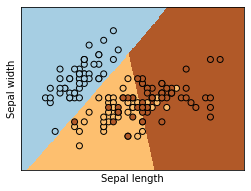

In [25]:
# sklearn上例子
# np_c_：按行拼接矩阵
# ravel:行转列
#
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5)
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # 网格大小，step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)


plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
y

NameError: name 'y' is not defined

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                         random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

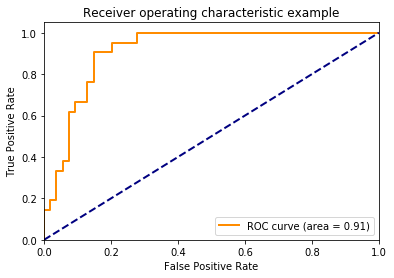

In [31]:
plt.figure()
idx = 0
lw = 2
plt.plot(fpr[idx], tpr[idx], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[idx])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [32]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,

In [10]:
n_classes

3

In [16]:
roc_auc["micro"]

0.7277333333333333

In [21]:
X

array([[ 5.1       ,  3.5       ,  1.4       , ..., -1.07709907,
        -0.4246633 , -0.8299646 ],
       [ 4.9       ,  3.        ,  1.4       , ...,  1.4121517 ,
        -1.38043075, -0.53591456],
       [ 4.7       ,  3.2       ,  1.3       , ...,  0.65880214,
        -0.59691711, -0.22295918],
       ...,
       [ 6.5       ,  3.        ,  5.2       , ..., -0.5154906 ,
        -0.12964864, -0.5092809 ],
       [ 6.2       ,  3.4       ,  5.4       , ...,  1.42147798,
        -0.61336209, -0.34432031],
       [ 5.9       ,  3.        ,  5.1       , ...,  2.53170549,
        -0.03572203,  0.17320019]])

In [22]:
X.shape

(150, 804)

In [23]:
n_samples

150

In [40]:
import numpy as np
from scipy.stats import pearsonr

np.random.seed(0)
size = 300
x = np.random.normal(0, 1, size)
print("Lower noise：", pearsonr(x, x + np.random.normal(0, 1, size)))
print("Higher noise：", pearsonr(x, x + np.random.normal(0, 10, size)))

iris = load_iris()
X, y = iris.data, iris.target  #iris数据集
from sklearn.feature_selection import SelectKBest
# 选择K个最好的特征，返回选择特征后的数据
# 第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
# 参数k为选择的特征个数
SelectKBest(lambda X, Y: np.array(map(lambda x:pearsonr(x, Y), X.T)).T, k=2).fit_transform(iris.data, iris.target)

Lower noise： (0.7182483686213834, 7.324017313000586e-49)
Higher noise： (0.05796429207933807, 0.3170099388532581)


TypeError: float() argument must be a string or a number, not 'map'

In [46]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target  #iris数据集

#选择K个最好的特征，返回选择特征后的数据
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
X_new

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [47]:
X_new.shape

(150, 3)

In [45]:
X.shape

(150, 4)

In [48]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

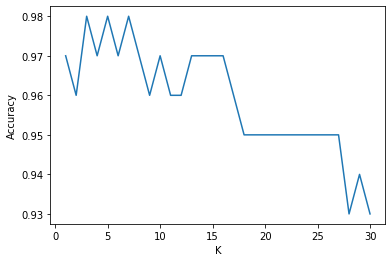

0.94


In [7]:
from sklearn import datasets	#自带数据集
from sklearn.model_selection import train_test_split,cross_val_score	#划分数据 交叉验证
from sklearn.neighbors import KNeighborsClassifier  #一个简单的模型，只有K一个参数，类似K-means
import matplotlib.pyplot as plt
iris = datasets.load_iris()		#加载sklearn自带的数据集
X = iris.data 			#这是数据
y = iris.target 		#这是每个数据所对应的标签
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=1/3,random_state=3)	#这里划分数据以1/3的来划分 训练集训练结果 测试集测试结果
k_range = range(1,31)
cv_scores = []		#用来放每个模型的结果值
for n in k_range:
    knn = KNeighborsClassifier(n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
    scores = cross_val_score(knn,train_X,train_y,cv=10,scoring='accuracy')  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')		#通过图像选择最好的参数
plt.show()
best_knn = KNeighborsClassifier(n_neighbors=3)	# 选择最优的K=3传入模型
best_knn.fit(train_X,train_y)			#训练模型
print(best_knn.score(test_X,test_y))	#看看评分

from IPython.display import IFrame
IFrame('https://www.csie.ntu.edu.tw/~b97053/paper/Rendle2010FM.pdf', width=800, height=450)

| 真实情况 | 预测结果     | 预测结果     |
| -------- |------------ | ------------ |
|          | 正例         | 反例         |
| 正例     |TP（真正例） | FN（假反例） |
| 反例     | FP（假正例） | TN（真反例）|

[Myfile](./assets/张量基础形状.png)